<a href="https://colab.research.google.com/github/pomipower/UIDIA_DataHack_2026/blob/main/UIDAI_DataHack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UIDAI Data Hack Combined Notebook

Problem Statement: Unlocking Societal Trends in Aadhaar Enrolment and Updates

Identify meaningful patterns, trends, anomalies, or predictive indicators and translate them into clear insights or solution frameworks that can support informed decision-making and system improvements.

Participants must submit one consolidated PDF containing the following sections:

Problem Statement and Approach: A concise description of the problem being addressed and the proposed analytical or technical approach.
Datasets Used: A clear description of the dataset(s) and columns used for the analysis. Participants must use the Aadhaar enrolment and/or update dataset provided by UIDAI.
Methodology: A detailed explanation of the methodology adopted, including data cleaning, preprocessing, and any transformations applied before analysis.
Data Analysis and Visualisation: A description of key findings and insights, and the visualisations or infographics developed. Participants must also include code files or notebooks used for the analysis (in the PDF itself).

Participants must submit one consolidated PDF containing the following sections:

Problem Statement and Approach: A concise description of the problem being addressed and the proposed analytical or technical approach.
Datasets Used: A clear description of the dataset(s) and columns used for the analysis. Participants must use the Aadhaar enrolment and/or update dataset provided by UIDAI.
Methodology: A detailed explanation of the methodology adopted, including data cleaning, preprocessing, and any transformations applied before analysis.
Data Analysis and Visualisation: A description of key findings and insights, and the visualisations or infographics developed. Participants must also include code files or notebooks used for the analysis (in the PDF itself).

## Load CSV Files

### Subtask:
Load each of the four CSV files from the specified paths into separate pandas DataFrames (df1, df2, df3, df4).


In [ ]:
import pandas as pd
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define output path for the combined biometric dataframe
biometric_output_path = '/content/drive/MyDrive/UIDAI DataHack Files/combined_aadhaar_biometricdata.csv'

# Initialize a flag to communicate to the next cell
global biometric_combined_exists
biometric_combined_exists = False

if os.path.exists(biometric_output_path):
    print(f"Combined biometric dataset already exists at: {biometric_output_path}. Skipping individual file loading.")
    biometric_combined_exists = True
    # Ensure df1, df2, df3, df4 are defined, even if as None, to prevent NameError in subsequent cells
    df1 = df2 = df3 = df4 = None
else:
    # Paths to the CSV files (as provided in "Selected file(s)")
    file_paths = [
        '/content/drive/MyDrive/UIDAI DataHack Files/api_data_aadhar_biometric/api_data_aadhar_biometric_0_500000.csv',
        '/content/drive/MyDrive/UIDAI DataHack Files/api_data_aadhar_biometric/api_data_aadhar_biometric_1000000_1500000.csv',
        '/content/drive/MyDrive/UIDAI DataHack Files/api_data_aadhar_biometric/api_data_aadhar_biometric_1500000_1861108.csv',
        '/content/drive/MyDrive/UIDAI DataHack Files/api_data_aadhar_biometric/api_data_aadhar_biometric_500000_1000000.csv'
    ]

    # DataFrames to store the loaded data
    dataframes = {}
    df_names = ['df1', 'df2', 'df3', 'df4']

    all_loaded_successfully = True
    # Check and load each file
    for i, path in enumerate(file_paths):
        df_name = df_names[i]
        if os.path.exists(path):
            try:
                dataframes[df_name] = pd.read_csv(path)
                print(f"Successfully loaded {path} into {df_name}.")
            except Exception as e:
                print(f"Error loading {path} into {df_name}: {e}")
                dataframes[df_name] = None # Mark as failed
                all_loaded_successfully = False
        else:
            print(f"Error: File not found at the specified path for {df_name}: {path}")
            dataframes[df_name] = None # Mark as failed
            all_loaded_successfully = False

    # Assign to individual df variables for consistency with original request
    df1 = dataframes.get('df1')
    df2 = dataframes.get('df2')
    df3 = dataframes.get('df3')
    df4 = dataframes.get('df4')

    if all_loaded_successfully:
        print("All four CSV files were attempted to be loaded into df1, df2, df3, and df4.")
    else:
        print("Some CSV files could not be loaded. Please check the error messages above and ensure the files exist at the specified paths in your Google Drive.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Combined biometric dataset already exists at: /content/drive/MyDrive/UIDAI DataHack Files/combined_aadhaar_biometricdata.csv. Skipping individual file loading.


In [ ]:
# Assume biometric_output_path and biometric_combined_exists are set in the previous cell.

if biometric_combined_exists:
    # If the combined file already exists, load it directly
    combined_df = pd.read_csv(biometric_output_path)
    print(f"Loaded combined biometric dataset from existing file: {biometric_output_path}")
else:
    # If the combined file does not exist, concatenate the loaded dataframes
    # Check if individual dataframes were loaded successfully (not None)
    if any(df is None for df in [df1, df2, df3, df4]):
        print("Error: One or more individual biometric dataframes (df1-df4) were not loaded successfully. Cannot concatenate.")
        combined_df = pd.DataFrame() # Create an empty DataFrame to avoid NameError in display/shape calls
    else:
        combined_df = pd.concat([df1, df2, df3, df4], ignore_index=True)
        # Export the combined DataFrame to CSV
        combined_df.to_csv(biometric_output_path, index=False)
        print(f"Combined dataset exported successfully to: {biometric_output_path}")

display(combined_df.head())
print(combined_df.shape)

Loaded combined biometric dataset from existing file: /content/drive/MyDrive/UIDAI DataHack Files/combined_aadhaar_biometricdata.csv


,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


(1861108, 6)


In [ ]:
import pandas as pd
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define output path for the combined demographic dataframe
demographic_output_path = '/content/drive/MyDrive/UIDAI DataHack Files/combined_aadhaar_demographicdata.csv'

# Initialize a flag to communicate to the next cell
global demographic_combined_exists
demographic_combined_exists = False

if os.path.exists(demographic_output_path):
    print(f"Combined demographic dataset already exists at: {demographic_output_path}. Skipping individual file loading.")
    demographic_combined_exists = True
    # Ensure df5, df6, df7, df8, df9 are defined, even if as None, to prevent NameError in subsequent cells
    df5 = df6 = df7 = df8 = df9 = None
else:
    # Paths to the CSV files (as provided in "Selected file(s)")
    file_paths = [
        '/content/drive/MyDrive/UIDAI DataHack Files/api_data_aadhar_demographic/api_data_aadhar_demographic_0_500000.csv',
        '/content/drive/MyDrive/UIDAI DataHack Files/api_data_aadhar_demographic/api_data_aadhar_demographic_1000000_1500000.csv',
        '/content/drive/MyDrive/UIDAI DataHack Files/api_data_aadhar_demographic/api_data_aadhar_demographic_1500000_2000000.csv',
        '/content/drive/MyDrive/UIDAI DataHack Files/api_data_aadhar_demographic/api_data_aadhar_demographic_2000000_2071700.csv',
        '/content/drive/MyDrive/UIDAI DataHack Files/api_data_aadhar_demographic/api_data_aadhar_demographic_500000_1000000.csv'
    ]

    # DataFrames to store the loaded data
    dataframes = {}
    df_names = ['df5', 'df6', 'df7', 'df8', 'df9']

    all_loaded_successfully = True
    # Check and load each file
    for i, path in enumerate(file_paths):
        df_name = df_names[i]
        if os.path.exists(path):
            try:
                dataframes[df_name] = pd.read_csv(path)
                print(f"Successfully loaded {path} into {df_name}.")
            except Exception as e:
                print(f"Error loading {path} into {df_name}: {e}")
                dataframes[df_name] = None # Mark as failed
                all_loaded_successfully = False
        else:
            print(f"Error: File not found at the specified path for {df_name}: {path}")
            dataframes[df_name] = None # Mark as failed
            all_loaded_successfully = False

    # Assign to individual df variables for consistency with original request
    df5 = dataframes.get('df5')
    df6 = dataframes.get('df6')
    df7 = dataframes.get('df7')
    df8 = dataframes.get('df8')
    df9 = dataframes.get('df9')

    if all_loaded_successfully:
        print("All five CSV files were attempted to be loaded into df5, df6, df7, df8 and df9.")
    else:
        print("Some CSV files could not be loaded. Please check the error messages above and ensure the files exist at the specified paths in your Google Drive.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Combined demographic dataset already exists at: /content/drive/MyDrive/UIDAI DataHack Files/combined_aadhaar_demographicdata.csv. Skipping individual file loading.


In [ ]:
# Assume demographic_output_path and demographic_combined_exists are set in the previous cell.

if demographic_combined_exists:
    # If the combined file already exists, load it directly
    combined_df2 = pd.read_csv(demographic_output_path)
    print(f"Loaded combined demographic dataset from existing file: {demographic_output_path}")
else:
    # If the combined file does not exist, concatenate the loaded dataframes
    # Check if individual dataframes were loaded successfully (not None)
    if any(df is None for df in [df5, df6, df7, df8, df9]):
        print("Error: One or more individual demographic dataframes (df5-df9) were not loaded successfully. Cannot concatenate.")
        combined_df2 = pd.DataFrame() # Create an empty DataFrame to avoid NameError in display/shape calls
    else:
        combined_df2 = pd.concat([df5, df6, df7, df8, df9], ignore_index=True)
        # Export the combined DataFrame to CSV
        combined_df2.to_csv(demographic_output_path, index=False)
        print(f"Combined dataset exported successfully to: {demographic_output_path}")

display(combined_df2.head())
print(combined_df2.shape)

Loaded combined demographic dataset from existing file: /content/drive/MyDrive/UIDAI DataHack Files/combined_aadhaar_demographicdata.csv


,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


(2071700, 6)


In [ ]:
import pandas as pd
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define output path for the combined enrolment dataframe
enrolment_output_path = '/content/drive/MyDrive/UIDAI DataHack Files/combined_aadhaar_enrolmentdata.csv'

# Initialize a flag to communicate to the next cell
global enrolment_combined_exists
enrolment_combined_exists = False

if os.path.exists(enrolment_output_path):
    print(f"Combined enrolment dataset already exists at: {enrolment_output_path}. Skipping individual file loading.")
    enrolment_combined_exists = True
    # Ensure df10, df11, df12 are defined, even if as None, to prevent NameError in subsequent cells
    df10 = df11 = df12 = None
else:
    # Paths to the CSV files (as provided in "Selected file(s)")
    file_paths = [
        '/content/drive/MyDrive/UIDAI DataHack Files/api_data_aadhar_enrolment/api_data_aadhar_enrolment_0_500000.csv',
        '/content/drive/MyDrive/UIDAI DataHack Files/api_data_aadhar_enrolment/api_data_aadhar_enrolment_1000000_1006029.csv',
        '/content/drive/MyDrive/UIDAI DataHack Files/api_data_aadhar_enrolment/api_data_aadhar_enrolment_500000_1000000.csv'
    ]

    # DataFrames to store the loaded data
    dataframes = {}
    df_names = ['df10', 'df11', 'df12']

    all_loaded_successfully = True
    # Check and load each file
    for i, path in enumerate(file_paths):
        df_name = df_names[i]
        if os.path.exists(path):
            try:
                dataframes[df_name] = pd.read_csv(path)
                print(f"Successfully loaded {path} into {df_name}.")
            except Exception as e:
                print(f"Error loading {path} into {df_name}: {e}")
                dataframes[df_name] = None # Mark as failed
                all_loaded_successfully = False
        else:
            print(f"Error: File not found at the specified path for {df_name}: {path}")
            dataframes[df_name] = None # Mark as failed
            all_loaded_successfully = False

    # Assign to individual df variables for consistency with original request
    df10 = dataframes.get('df10')
    df11 = dataframes.get('df11')
    df12 = dataframes.get('df12')

    if all_loaded_successfully:
        print("All three CSV files were attempted to be loaded into df10, df11, df12")
    else:
        print("Some CSV files could not be loaded. Please check the error messages above and ensure the files exist at the specified paths in your Google Drive.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Combined enrolment dataset already exists at: /content/drive/MyDrive/UIDAI DataHack Files/combined_aadhaar_enrolmentdata.csv. Skipping individual file loading.


In [ ]:
# Assume enrolment_output_path and enrolment_combined_exists are set in the previous cell.

if enrolment_combined_exists:
    # If the combined file already exists, load it directly
    combined_df3 = pd.read_csv(enrolment_output_path)
    print(f"Loaded combined enrolment dataset from existing file: {enrolment_output_path}")
else:
    # If the combined file does not exist, concatenate the loaded dataframes
    # Check if individual dataframes were loaded successfully (not None)
    if any(df is None for df in [df10, df11, df12]):
        print("Error: One or more individual enrolment dataframes (df10-df12) were not loaded successfully. Cannot concatenate.")
        combined_df3 = pd.DataFrame() # Create an empty DataFrame to avoid NameError in display/shape calls
    else:
        combined_df3 = pd.concat([df10, df11, df12], ignore_index=True)
        # Export the combined DataFrame to CSV
        combined_df3.to_csv(enrolment_output_path, index=False)
        print(f"Combined dataset exported successfully to: {enrolment_output_path}")

display(combined_df3.head())
print(combined_df3.shape)

Loaded combined enrolment dataset from existing file: /content/drive/MyDrive/UIDAI DataHack Files/combined_aadhaar_enrolmentdata.csv


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


(1006029, 7)


#Exploratory Data Analysis (EDA)

In [ ]:
# Imprt Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Import Datasets
bio_df = pd.read_csv("/content/drive/MyDrive/UIDAI DataHack Files/combined_aadhaar_biometricdata.csv")
demo_df = pd.read_csv("/content/drive/MyDrive/UIDAI DataHack Files/combined_aadhaar_demographicdata.csv")
enrol_df = pd.read_csv("/content/drive/MyDrive/UIDAI DataHack Files/combined_aadhaar_enrolmentdata.csv")

In [ ]:
print("Head of Biometric DataFrame (bio_df):")
display(bio_df.head())
print("\nHead of Demographic DataFrame (demo_df):")
display(demo_df.head())
print("\nHead of Enrolment DataFrame (enrol_df):")
display(enrol_df.head())

Head of Biometric DataFrame (bio_df):


,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815



Head of Demographic DataFrame (demo_df):


,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785



Head of Enrolment DataFrame (enrol_df):


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [ ]:
print("Shape of Biometric DataFrame (bio_df):")
print(bio_df.shape)
print("\nShape of Demographic DataFrame (demo_df):")
print(demo_df.shape)
print("\nShape of Enrolment DataFrame (enrol_df):")
print(enrol_df.shape)

Shape of Biometric DataFrame (bio_df):
(1861108, 6)

Shape of Demographic DataFrame (demo_df):
(2071700, 6)

Shape of Enrolment DataFrame (enrol_df):
(1006029, 7)


In [ ]:
VALID_STATES = {
    'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh',
    'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jharkhand',
    'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
    'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan',
    'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
    'Uttarakhand', 'West Bengal',
    'Andaman and Nicobar Islands', 'Chandigarh', 'Delhi',
    'Dadra and Nagar Haveli and Daman and Diu',
    'Jammu and Kashmir', 'Ladakh', 'Lakshadweep', 'Puducherry'
}


# EDA on BIOMETRIC DATA

In [ ]:
display(bio_df.head())
print(bio_df.shape)

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


(1861108, 6)


In [ ]:
bio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861108 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   date          object
 1   state         object
 2   district      object
 3   pincode       int64 
 4   bio_age_5_17  int64 
 5   bio_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 85.2+ MB


In [ ]:
bio_df.describe()

,pincode,bio_age_5_17,bio_age_17_
count,1.861108e+06,1.861108e+06,1.861108e+06
mean,5.217612e+05,1.839058e+01,1.909413e+01
std,1.981627e+05,8.370421e+01,8.806502e+01
min,1.100010e+05,0.000000e+00,0.000000e+00
25%,3.911750e+05,1.000000e+00,1.000000e+00
50%,5.224010e+05,3.000000e+00,4.000000e+00
75%,6.866362e+05,1.100000e+01,1.000000e+01
max,8.554560e+05,8.002000e+03,7.625000e+03


In [ ]:
bio_df['state'].unique()

array(['Haryana', 'Bihar', 'Jammu and Kashmir', 'Tamil Nadu',
       'Maharashtra', 'Gujarat', 'Odisha', 'West Bengal', 'Kerala',
       'Rajasthan', 'Punjab', 'Himachal Pradesh', 'Uttar Pradesh',
       'Assam', 'Uttarakhand', 'Madhya Pradesh', 'Karnataka',
       'Andhra Pradesh', 'Telangana', 'Goa', 'Nagaland', 'Jharkhand',
       'Delhi', 'Chhattisgarh', 'Meghalaya', 'Chandigarh', 'Orissa',
       'Puducherry', 'Pondicherry', 'Manipur', 'Sikkim', 'Tripura',
       'Mizoram', 'Arunachal Pradesh', 'Ladakh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Daman and Diu',
       'Andaman and Nicobar Islands', 'Andaman & Nicobar Islands',
       'Dadra and Nagar Haveli', 'Lakshadweep', 'Daman & Diu',
       'Dadra & Nagar Haveli', 'Jammu & Kashmir', 'WESTBENGAL',
       'andhra pradesh', 'Westbengal', 'West  Bengal', 'WEST BENGAL',
       'West Bangal', 'ODISHA', 'odisha', 'West bengal', 'west Bengal',
       'Uttaranchal', 'Chhatisgarh', 'Tamilnadu'], dtype=object)

In [ ]:
print(bio_df['state'].nunique(), demo_df['state'].nunique(), enrol_df['state'].nunique())

57 65 55


In [ ]:
print(bio_df['date'].nunique(), demo_df['date'].nunique(), enrol_df['date'].nunique())

89 95 92


In [ ]:
# Checking Null Values
for col in bio_df.columns:
  print(f'{col}:', bio_df[col].isna().sum())

date: 0
state: 0
district: 0
pincode: 0
bio_age_5_17: 0
bio_age_17_: 0


In [ ]:
import re

# 1. Convert 'date' column to datetime
bio_df['date'] = pd.to_datetime(bio_df['date'], format='%d-%m-%Y', errors='coerce')
print("Date column converted to datetime. Failed Conversions: ", bio_df['date'].isna().sum())

# 2. Standardize 'state' column

# Step 1: basic text normalization function
def normalize_state_name(name):
    name = name.strip().lower()
    name = re.sub(r'\s+', ' ', name)            # remove extra spaces
    name = re.sub(r'[&]', 'and', name)          # & → and
    name = re.sub(r'[^a-z\s]', '', name)        # remove special characters
    return name


# Step 2: canonical mapping dictionary
state_mapping = {
    # Andhra Pradesh
    'andhra pradesh': 'Andhra Pradesh',

    # Arunachal Pradesh
    'arunachal pradesh': 'Arunachal Pradesh',

    # Assam
    'assam': 'Assam',

    # Bihar
    'bihar': 'Bihar',

    # Chhattisgarh
    'chhattisgarh': 'Chhattisgarh',
    'chhatisgarh': 'Chhattisgarh',

    # Goa
    'goa': 'Goa',

    # Gujarat
    'gujarat': 'Gujarat',

    # Haryana
    'haryana': 'Haryana',

    # Himachal Pradesh
    'himachal pradesh': 'Himachal Pradesh',

    # Jharkhand
    'jharkhand': 'Jharkhand',

    # Karnataka
    'karnataka': 'Karnataka',

    # Kerala
    'kerala': 'Kerala',

    # Madhya Pradesh
    'madhya pradesh': 'Madhya Pradesh',

    # Maharashtra
    'maharashtra': 'Maharashtra',

    # Manipur
    'manipur': 'Manipur',

    # Meghalaya
    'meghalaya': 'Meghalaya',

    # Mizoram
    'mizoram': 'Mizoram',

    # Nagaland
    'nagaland': 'Nagaland',

    # Odisha
    'odisha': 'Odisha',
    'orissa': 'Odisha',

    # Punjab
    'punjab': 'Punjab',

    # Rajasthan
    'rajasthan': 'Rajasthan',

    # Sikkim
    'sikkim': 'Sikkim',

    # Tamil Nadu
    'tamil nadu': 'Tamil Nadu',
    'tamilnadu': 'Tamil Nadu',

    # Telangana
    'telangana': 'Telangana',

    # Tripura
    'tripura': 'Tripura',

    # Uttar Pradesh
    'uttar pradesh': 'Uttar Pradesh',

    # Uttarakhand
    'uttarakhand': 'Uttarakhand',
    'uttaranchal': 'Uttarakhand',

    # West Bengal
    'west bengal': 'West Bengal',
    'westbengal': 'West Bengal',
    'west bangal': 'West Bengal',

    # --- UNION TERRITORIES ---

    # Andaman & Nicobar
    'andaman and nicobar islands': 'Andaman and Nicobar Islands',

    # Chandigarh
    'chandigarh': 'Chandigarh',

    # Delhi
    'delhi': 'Delhi',

    # Jammu & Kashmir
    'jammu and kashmir': 'Jammu and Kashmir',

    # Ladakh
    'ladakh': 'Ladakh',

    # Lakshadweep
    'lakshadweep': 'Lakshadweep',

    # Puducherry
    'puducherry': 'Puducherry',
    'pondicherry': 'Puducherry',

    # Dadra & Nagar Haveli + Daman & Diu (merged UT)
    'dadra and nagar haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'daman and diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'dadra and nagar haveli and daman and diu': 'Dadra and Nagar Haveli and Daman and Diu'
}


# Step 3: apply cleaning
bio_df['state_clean'] = (
    bio_df['state']
    .apply(normalize_state_name)
    .map(state_mapping)
)
print("State column standardized.")

# 3. Standardize 'district' column
# Convert to lowercase and strip whitespace
bio_df['district'] = bio_df['district'].str.lower().str.strip()
# Capitalize the first letter of each word
bio_df['district'] = bio_df['district'].apply(lambda x: ' '.join([word.capitalize() for word in x.split()]) if isinstance(x, str) else x)
print("District column standardized.")

# Display info and head to verify changes
print("\nUpdated bio_df:")
display(bio_df.head())

print('\nUnique states after standardization:\nCount:', bio_df['state_clean'].nunique(), '\n', sorted(bio_df['state_clean'].unique()))

print('\nUnique districts after standardization:\nCount:', bio_df['district'].nunique(), '\n', bio_df['district'].unique())

Date column converted to datetime. Failed Conversions:  0
State column standardized.
District column standardized.

Updated bio_df:


,date,state,district,pincode,bio_age_5_17,bio_age_17_,state_clean
0,2025-03-01,Haryana,Mahendragarh,123029,280,577,Haryana
1,2025-03-01,Bihar,Madhepura,852121,144,369,Bihar
2,2025-03-01,Jammu and Kashmir,Punch,185101,643,1091,Jammu and Kashmir
3,2025-03-01,Bihar,Bhojpur,802158,256,980,Bihar
4,2025-03-01,Tamil Nadu,Madurai,625514,271,815,Tamil Nadu



Unique states after standardization:
Count: 36 
 ['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']

Unique districts after standardization:
Count: 949 
 ['Mahendragarh' 'Madhepura' 'Punch' 'Bhojpur' 'Madurai' 'Ratnagiri'
 'Anand' 'Gandhinagar' 'Dhenkanal' 'Valsad' 'Salem' 'Hooghly'
 'Paschim Medinipur' 'Wayanad' 'Sawai Madhopur' 'Vaishali' 'Karur'
 'Rupnagar' 'Sabarkantha' 'Una' 'Bhilwara' 'Bara Banki' 'Cachar'
 'Dehradun' 'Chamba' 'Shajapur' 'The Nilgiris' 'Wardha' 'Nabarangapur'
 'Shaheed Bhagat Singh Nagar' 'Davange

In [ ]:
# # Define a mapping for inconsistent state names
# state_mapping = {
#     # West Bengal
#     'west bengal': 'West Bengal',
#     'west bangal': 'West Bengal',
#     'westbengal': 'West Bengal',
#     'west  bengal': 'West Bengal',
#     'westbengal ': 'West Bengal',
#     'west bengli':  'West Bengal',


#     # Andhra Pradesh
#     'andhra pradesh': 'Andhra Pradesh',

#     # Odisha
#     'odisha': 'Odisha',
#     'orissa': 'Odisha',

#     # Jammu & Kashmir
#     'jammu and kashmir': 'Jammu and Kashmir',
#     'jammu kashmir': 'Jammu and Kashmir',

#     # Collapse all Dadra / Daman variants into ONE state
#     'dadra nagar haveli': 'Dadra and Nagar Haveli and Daman and Diu',
#     'dadra and nagar haveli': 'Dadra and Nagar Haveli and Daman and Diu',
#     'daman and diu': 'Dadra and Nagar Haveli and Daman and Diu',
#     'dadra and nagar haveli and daman and diu': 'Dadra and Nagar Haveli and Daman and Diu',
#     'the dadra and nagar haveli and daman and diu': 'Dadra and Nagar Haveli and Daman and Diu',
#     'daman diu': 'Dadra and Nagar Haveli and Daman and Diu',

#     # Puducherry
#     'puducherry': 'Puducherry',
#     'pondicherry': 'Puducherry',

#     # Andaman & Nicobar Islands
#     'andaman and nicobar islands': 'Andaman and Nicobar Islands',
#     'andaman nicobar islands': 'Andaman and Nicobar Islands',


#     # Case-normalized direct matches
#     'delhi': 'Delhi',
#     'ladakh': 'Ladakh',
#     'goa': 'Goa',
#     'sikkim': 'Sikkim',
#     'assam': 'Assam',
#     'bihar': 'Bihar',
#     'punjab': 'Punjab',
#     'kerala': 'Kerala',
#     'haryana': 'Haryana',
#     'gujarat': 'Gujarat',
#     'tamil nadu': 'Tamil Nadu',
#     'telangana': 'Telangana',
#     'karnataka': 'Karnataka',
#     'maharashtra': 'Maharashtra',
#     'Nagpur': 'Maharashtra',
#     'rajasthan': 'Rajasthan',
#     'uttar pradesh': 'Uttar Pradesh',
#     'madhya pradesh': 'Madhya Pradesh',
#     'himachal pradesh': 'Himachal Pradesh',
#     'arunachal pradesh': 'Arunachal Pradesh',
#     'chhattisgarh': 'Chhattisgarh',
#     'chhatisgarh' : 'Chhattisgarh',
#     'jharkhand': 'Jharkhand',
#     'manipur': 'Manipur',
#     'meghalaya': 'Meghalaya',
#     'mizoram': 'Mizoram',
#     'nagaland': 'Nagaland',
#     'tripura': 'Tripura',
#     'uttarakhand': 'Uttarakhand',
#     'lakshadweep': 'Lakshadweep',
#     'chandigarh': 'Chandigarh'
# }

# # Replacement
# #bio_df['state'] = bio_df['state'].replace(state_mapping, regex=True)


# # Capitalize the first letter of each word
# #bio_df['state'] = bio_df['state'].apply(lambda x: ' '.join([word.capitalize() for word in x.split()]) if isinstance(x, str) else x)


# # Drop invalid entries like numeric junk
# bio_df = bio_df[~bio_df['state'].astype(str).str.isnumeric()]






In [ ]:
print("Value counts for 'state' column:")
state_counts = bio_df['state'].value_counts()
display(state_counts.head(20))

Value counts for 'state' column:


,count
state,
Tamil Nadu,184568
Andhra Pradesh,172034
Uttar Pradesh,155242
Maharashtra,151104
Karnataka,141227
West Bengal,130735
Kerala,98511
Gujarat,89531
Odisha,86476


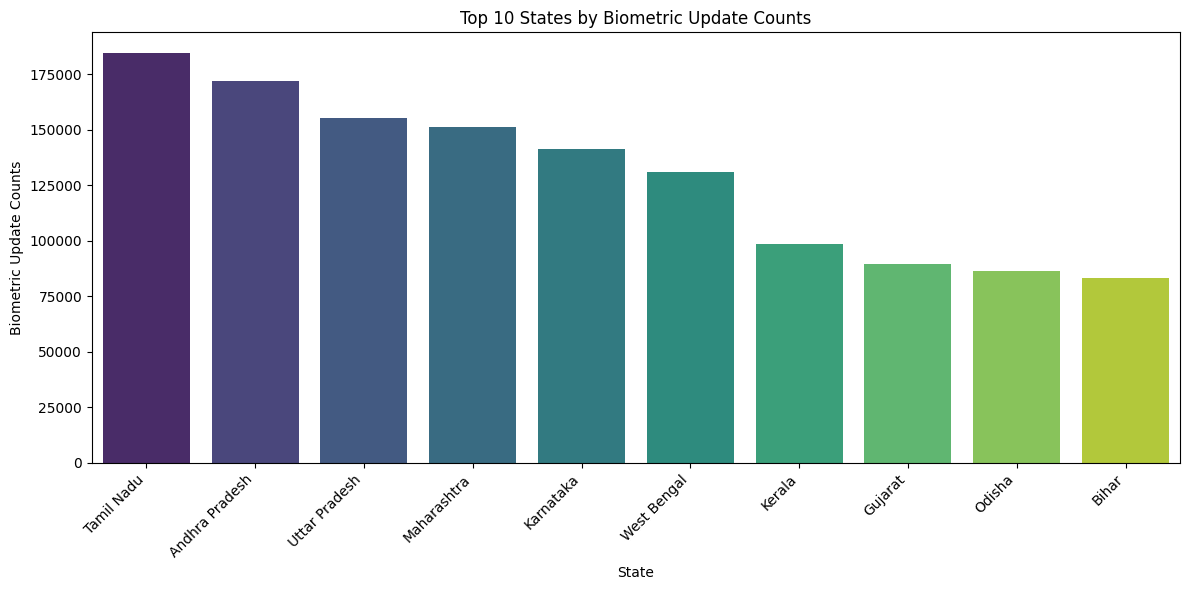

Bar chart for top 10 states displayed.


In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.head(10).index, y=state_counts.head(10).values, hue=state_counts.head(10).index, palette='viridis', legend=False)
plt.title('Top 10 States by Biometric Update Counts')
plt.xlabel('State')
plt.ylabel('Biometric Update Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Bar chart for top 10 states displayed.")

In [ ]:
print("Value counts for 'district' column:")
district_counts = bio_df['district'].value_counts()
display(district_counts.head(10))

Value counts for 'district' column:


,count
district,
Pune,11586
Thrissur,11165
East Godavari,10647
North 24 Parganas,10595
Barddhaman,10545
Warangal,9976
Palakkad,9605
Karimnagar,9514
Hyderabad,9422


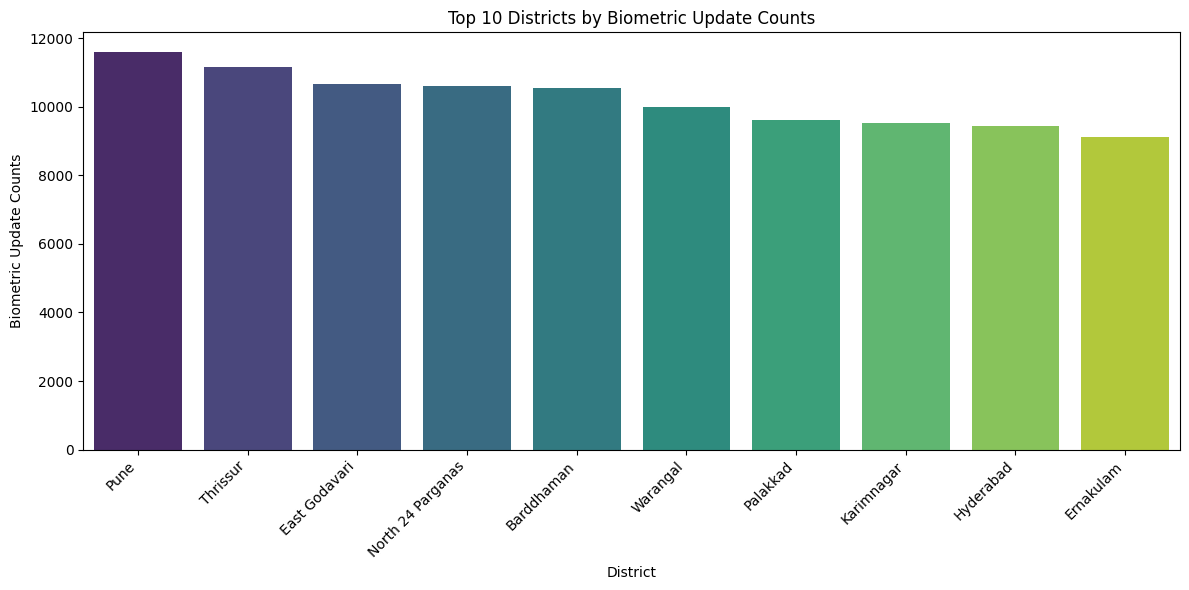

Bar chart for top 10 districts displayed.


In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=district_counts.head(10).index, y=district_counts.head(10).values, hue=district_counts.head(10).index, palette='viridis', legend=False)
plt.title('Top 10 Districts by Biometric Update Counts')
plt.xlabel('District')
plt.ylabel('Biometric Update Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Bar chart for top 10 districts displayed.")

In [ ]:
print("Descriptive statistics for 'bio_age_5_17' and 'bio_age_17_':")
display(bio_df[['bio_age_5_17', 'bio_age_17_']].describe())

Descriptive statistics for 'bio_age_5_17' and 'bio_age_17_':


,bio_age_5_17,bio_age_17_
count,1.861108e+06,1.861108e+06
mean,1.839058e+01,1.909413e+01
std,8.370421e+01,8.806502e+01
min,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00
50%,3.000000e+00,4.000000e+00
75%,1.100000e+01,1.000000e+01
max,8.002000e+03,7.625000e+03


In [ ]:
zero_count_5_17 = (bio_df['bio_age_5_17'] == 0).sum()
zero_count_17_plus = (bio_df['bio_age_17_'] == 0).sum()

print(f"Number of zeroes in 'bio_age_5_17': {zero_count_5_17}")
print(f"Number of zeroes in 'bio_age_17_': {zero_count_17_plus}")

# Drop rows where 'bio_age_5_17' or 'bio_age_17_' have zero values
bio_df_filtered = bio_df[(bio_df['bio_age_5_17'] != 0) & (bio_df['bio_age_17_'] != 0)]

print(f"Original bio_df shape: {bio_df.shape}")
print(f"Filtered bio_df shape: {bio_df_filtered.shape}")

display(bio_df_filtered.head(0))

Number of zeroes in 'bio_age_5_17': 287670
Number of zeroes in 'bio_age_17_': 196095
Original bio_df shape: (1861108, 7)
Filtered bio_df shape: (1377355, 7)


,date,state,district,pincode,bio_age_5_17,bio_age_17_,state_clean


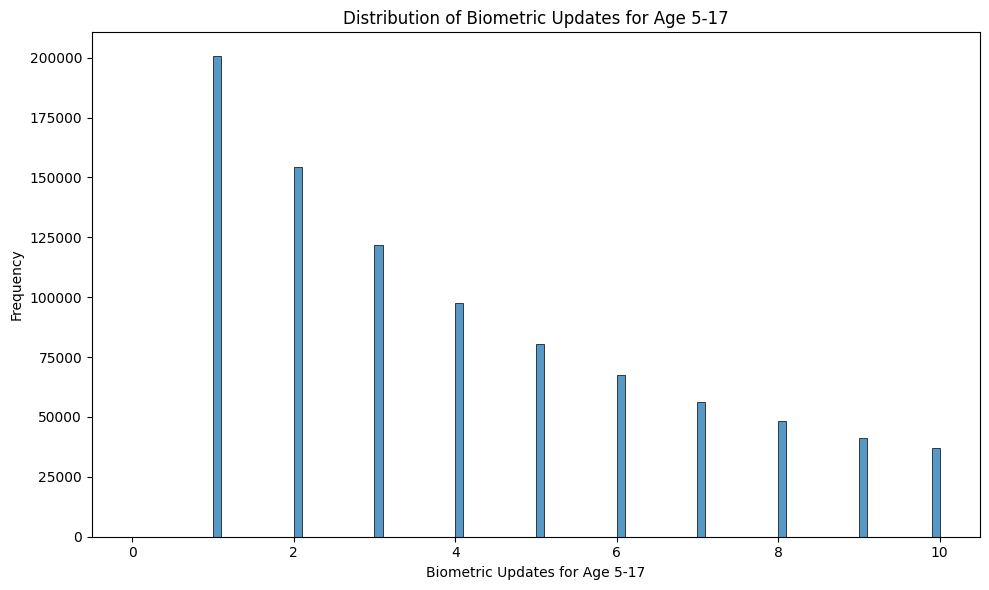

Histogram for 'bio_age_5_17' displayed.


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(bio_df_filtered['bio_age_5_17'], bins=100, binrange=(0, 10))
plt.title('Distribution of Biometric Updates for Age 5-17')
plt.xlabel('Biometric Updates for Age 5-17')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
print("Histogram for 'bio_age_5_17' displayed.")

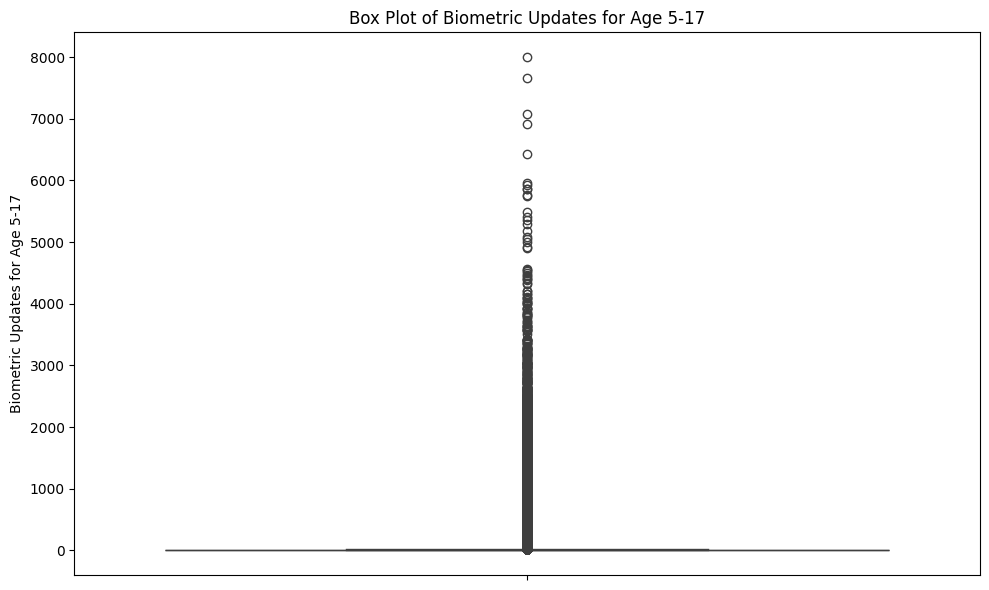

Box plot for 'bio_age_5_17' displayed.


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=bio_df['bio_age_5_17'])
plt.title('Box Plot of Biometric Updates for Age 5-17')
plt.ylabel('Biometric Updates for Age 5-17')
plt.tight_layout()
plt.show()
print("Box plot for 'bio_age_5_17' displayed.")

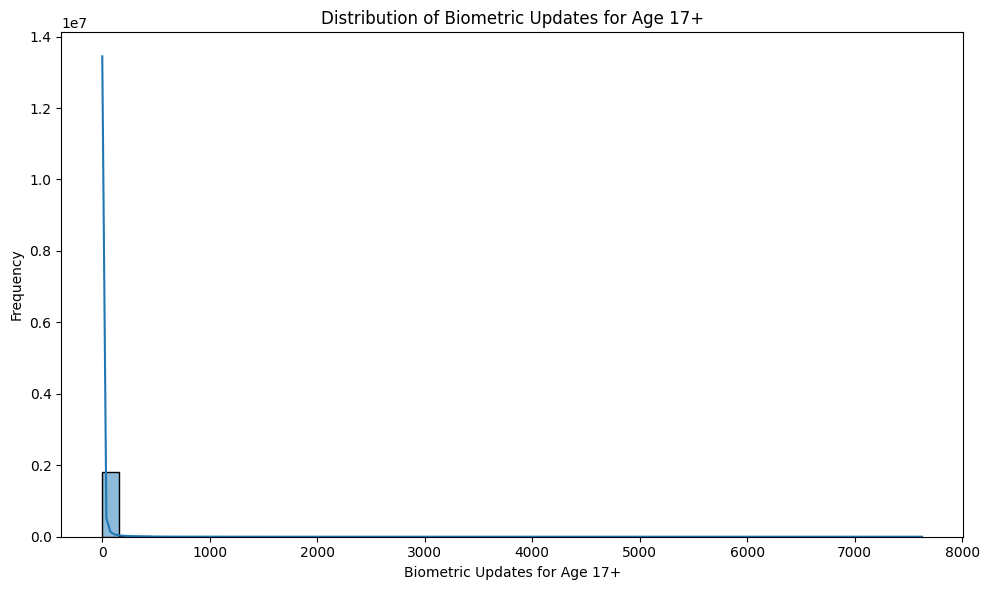

Histogram for 'bio_age_17_' displayed.


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(bio_df['bio_age_17_'], bins=50, kde=True)
plt.title('Distribution of Biometric Updates for Age 17+')
plt.xlabel('Biometric Updates for Age 17+')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
print("Histogram for 'bio_age_17_' displayed.")

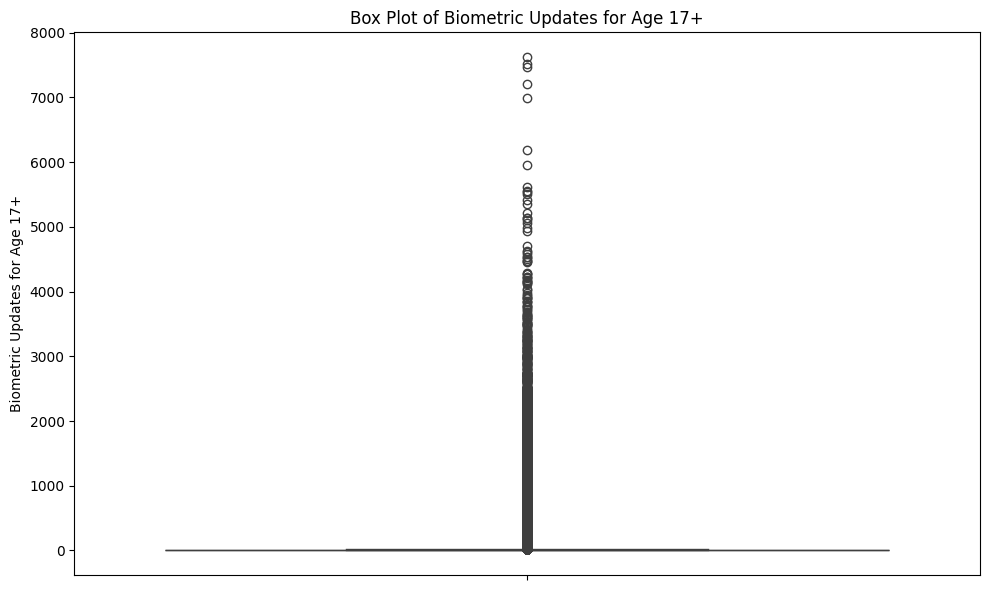

Box plot for 'bio_age_17_' displayed.


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=bio_df['bio_age_17_'])
plt.title('Box Plot of Biometric Updates for Age 17+')
plt.ylabel('Biometric Updates for Age 17+')
plt.tight_layout()
plt.show()
print("Box plot for 'bio_age_17_' displayed.")

In [ ]:
bio_df_copy = bio_df.copy()
bio_df_copy['total_biometric_updates'] = bio_df['bio_age_5_17'] + bio_df['bio_age_17_']
print("'total_biometric_updates' column created.")
display(bio_df_copy.head())

'total_biometric_updates' column created.


,date,state,district,pincode,bio_age_5_17,bio_age_17_,state_clean,total_biometric_updates
0,2025-03-01,Haryana,Mahendragarh,123029,280,577,Haryana,857
1,2025-03-01,Bihar,Madhepura,852121,144,369,Bihar,513
2,2025-03-01,Jammu and Kashmir,Punch,185101,643,1091,Jammu and Kashmir,1734
3,2025-03-01,Bihar,Bhojpur,802158,256,980,Bihar,1236
4,2025-03-01,Tamil Nadu,Madurai,625514,271,815,Tamil Nadu,1086


In [ ]:
print("Descriptive statistics for 'total_biometric_updates' column:")
display(bio_df_copy['total_biometric_updates'].describe())

Descriptive statistics for 'total_biometric_updates' column:


,total_biometric_updates
count,1.861108e+06
mean,3.748471e+01
std,1.623302e+02
min,0.000000e+00
25%,3.000000e+00
50%,8.000000e+00
75%,2.200000e+01
max,1.338100e+04


In [ ]:
daily_updates_df = bio_df_copy.groupby('date')['total_biometric_updates'].sum().reset_index()
print("Aggregated daily biometric updates.")

Aggregated daily biometric updates.


In [ ]:
daily_updates_df.head()

,date,total_biometric_updates
0,2025-03-01,8322222
1,2025-04-01,8641679
2,2025-05-01,7879956
3,2025-06-01,7899289
4,2025-07-01,9792552


In [ ]:
daily_updates_df = daily_updates_df.sort_values(by='date', ascending=True)
print("Daily updates DataFrame sorted by date.")

Daily updates DataFrame sorted by date.


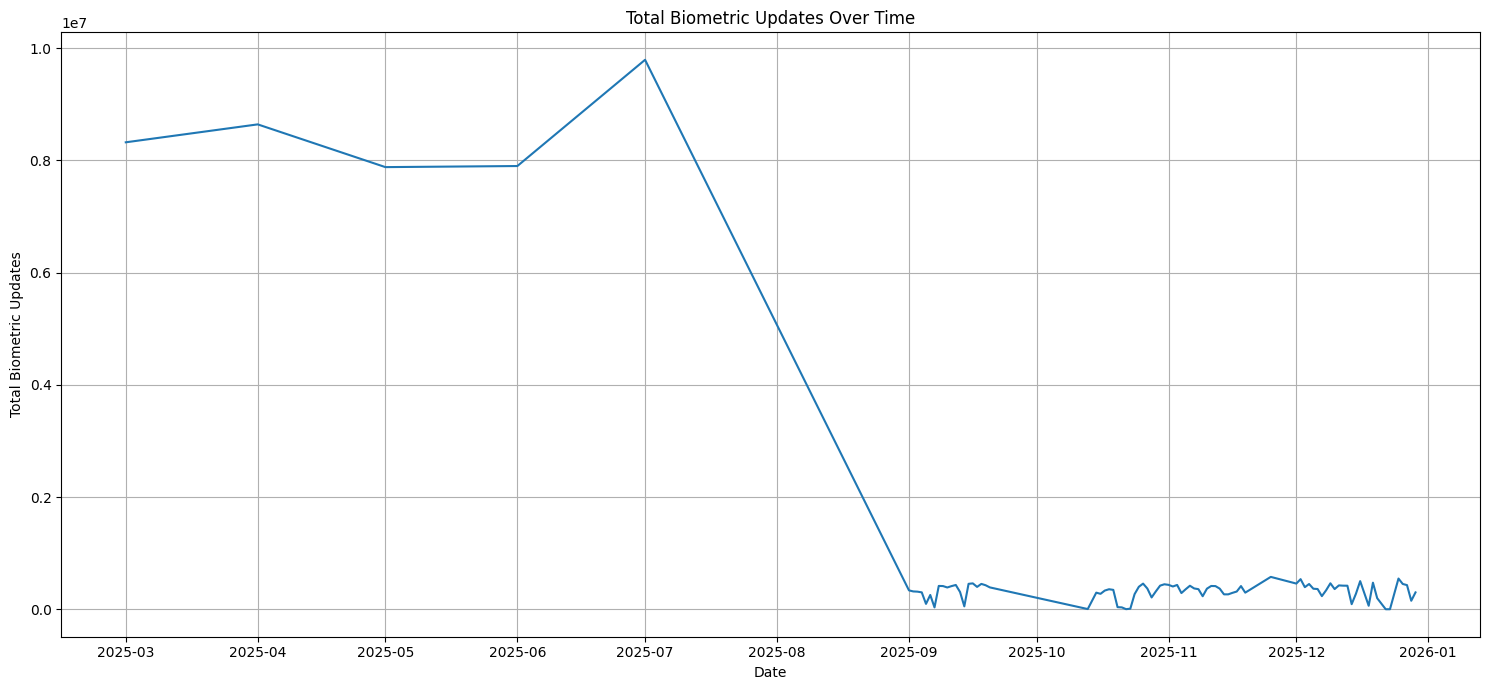

Line plot for total biometric updates over time displayed.


In [ ]:
plt.figure(figsize=(15, 7))
sns.lineplot(x='date', y='total_biometric_updates', data=daily_updates_df)
plt.title('Total Biometric Updates Over Time')
plt.xlabel('Date')
plt.ylabel('Total Biometric Updates')
plt.grid(True)
plt.tight_layout()
plt.show()
print("Line plot for total biometric updates over time displayed.")

/tmp/ipython-input-2135157640.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='district', y='total_biometric_updates', data=district_updates, palette='viridis')


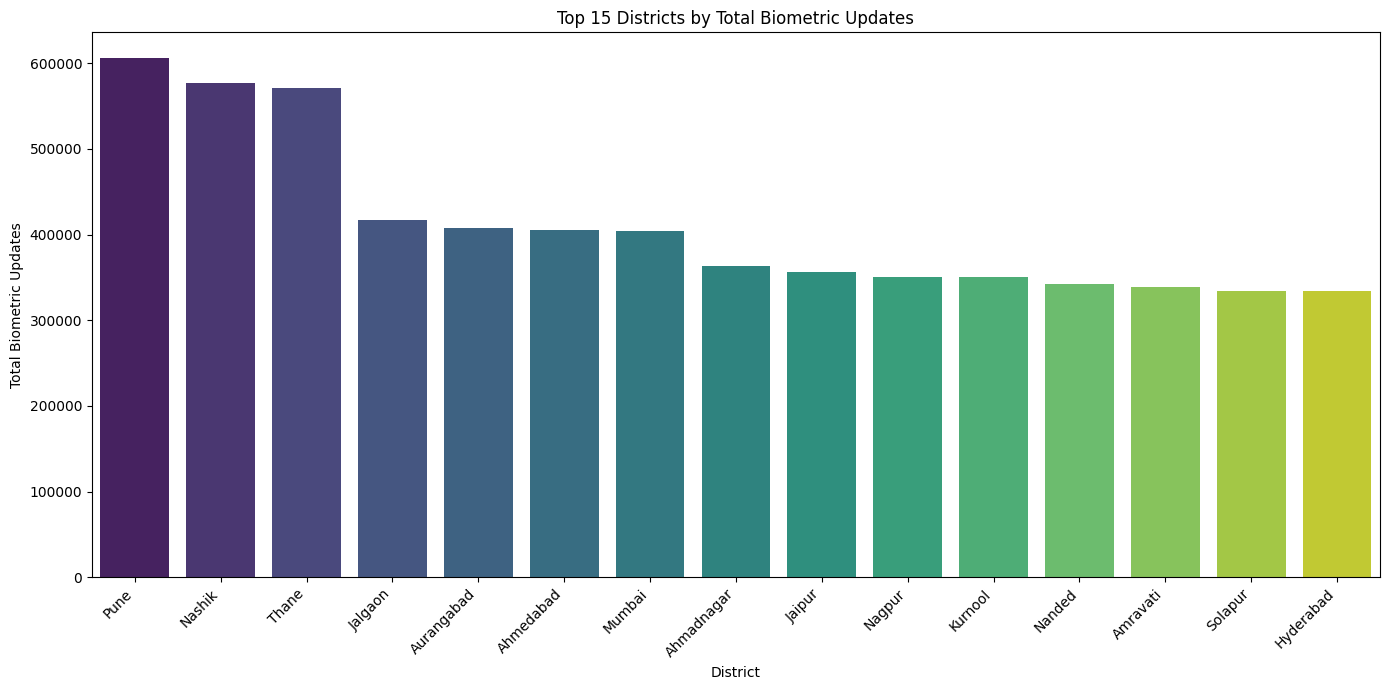

Bar plot for top 15 districts by total biometric updates displayed.


In [ ]:
bio_df_copy['total_biometric_updates'] = bio_df_copy['bio_age_5_17'] + bio_df_copy['bio_age_17_']
district_updates = bio_df_copy.groupby('district')['total_biometric_updates'].sum().nlargest(15).reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='district', y='total_biometric_updates', data=district_updates, palette='viridis')
plt.title('Top 15 Districts by Total Biometric Updates')
plt.xlabel('District')
plt.ylabel('Total Biometric Updates')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Bar plot for top 15 districts by total biometric updates displayed.")

In [ ]:
Q1 = daily_updates_df['total_biometric_updates'].quantile(0.25)
Q3 = daily_updates_df['total_biometric_updates'].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")

Q1: 275713.0
Q3: 430370.0
IQR: 154657.0


In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")

Lower Bound for Outliers: 43727.5
Upper Bound for Outliers: 662355.5


In [ ]:
outliers = daily_updates_df[(daily_updates_df['total_biometric_updates'] < lower_bound) | (daily_updates_df['total_biometric_updates'] > upper_bound)]
print("Identified Outliers (dates and total biometric updates):")
display(outliers)

Identified Outliers (dates and total biometric updates):


,date,total_biometric_updates
0,2025-03-01,8322222
1,2025-04-01,8641679
2,2025-05-01,7879956
3,2025-06-01,7899289
4,2025-07-01,9792552
11,2025-09-07,32956
25,2025-10-13,3378
31,2025-10-20,37356
32,2025-10-21,33407
33,2025-10-22,1681


## Summary:

### Data Analysis Key Findings
*   **Data Cleaning and Standardization**:
    *   The 'date' column was successfully converted to `datetime` objects for accurate time-series analysis.
    *   The 'state' and 'district' columns were standardized by converting to lowercase, stripping whitespace, applying specific replacements for inconsistent state spellings (e.g., 'West Bengal', 'Odisha', 'Jammu And Kashmir', 'Puducherry', 'Daman And Diu', 'Dadra And Nagar Haveli', 'Andhra Pradesh', 'Uttarakhand', 'Chhattisgarh', 'Tamil Nadu'), and then capitalizing the first letter of each word.
*   **Top Regions by Biometric Updates**:
    *   **States**: Tamil Nadu (184,569 updates), Andhra Pradesh (172,065 updates), and Uttar Pradesh (155,242 updates) showed the highest biometric update counts.
    *   **Districts**: Pune (11,586 updates), Thrissur (11,165 updates), and East Godavari (10,647 updates) recorded the highest number of biometric updates.
*   **Distribution of Biometric Updates by Age Group**:
    *   Both 'bio\_age\_5\_17' and 'bio\_age\_17\_' columns exhibited highly right-skewed distributions, with a mean of approximately 18.39 and 19.09 respectively, and maximum values reaching 8002 and 7625. The 75th percentile for both was low (11 and 10), indicating a large number of lower values and significant outliers.
*   **Total Biometric Updates**: A new column, 'total\_biometric\_updates', was created by summing 'bio\_age\_5\_17' and 'bio\_age\_17\_', showing a mean of approximately 37.48 and a maximum of 13,381.
*   **Outliers in Daily Biometric Updates**:
    *   Using the Interquartile Range (IQR) method, several significant outliers were identified in the daily 'total\_biometric\_updates'.
    *   The lower bound for outliers was calculated as 43,727.5, and the upper bound as 662,355.5.
    *   Dates like 2025-03-01 (8,322,222 updates) and 2025-07-01 (9,792,552 updates) showed exceptionally high update counts, while dates such as 2025-10-13 (3,378 updates) and 2025-12-22 (39 updates) registered unusually low activity.

### Insights or Next Steps
*   The presence of extreme outliers in daily biometric update counts suggests potential data entry issues, system anomalies, or significant policy/operational events that warrant further investigation to ensure data integrity and understand underlying causes.
*   Further analysis should involve investigating the specific dates identified as outliers to correlate them with external factors (e.g., public holidays, system outages, marketing campaigns) or regional-level data to understand the drivers behind these fluctuations.


# EDA on DEMOGRAPHIC DATA

In [ ]:
demo_df.head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


In [ ]:
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071700 entries, 0 to 2071699
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date           object
 1   state          object
 2   district       object
 3   pincode        int64 
 4   demo_age_5_17  int64 
 5   demo_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 94.8+ MB


In [ ]:
demo_df['state'].unique()

array(['Uttar Pradesh', 'Andhra Pradesh', 'Gujarat', 'Rajasthan',
       'Karnataka', 'West Bengal', 'Telangana', 'Odisha', 'Maharashtra',
       'Kerala', 'Bihar', 'Tamil Nadu', 'Madhya Pradesh', 'Assam',
       'Tripura', 'Arunachal Pradesh', 'Punjab', 'Jharkhand', 'Delhi',
       'Chandigarh', 'Chhattisgarh', 'Jammu and Kashmir', 'Mizoram',
       'Nagaland', 'Himachal Pradesh', 'Goa', 'Haryana', 'Meghalaya',
       'Uttarakhand', 'Manipur', 'Daman and Diu', 'Puducherry', 'Sikkim',
       'Ladakh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Dadra and Nagar Haveli', 'Orissa', 'Pondicherry',
       'Andaman & Nicobar Islands', 'Andaman and Nicobar Islands',
       'west Bengal', 'Daman & Diu', 'West  Bengal', 'odisha',
       'Jammu & Kashmir', 'Lakshadweep', 'Dadra & Nagar Haveli',
       'Westbengal', 'andhra pradesh', 'WEST BENGAL', 'West Bangal',
       'West bengal', 'ODISHA', 'WESTBENGAL', 'Chhatisgarh',
       'West Bengli', 'Darbhanga', 'Puttenahalli', 'Uttaranchal',


In [ ]:
import re

# 1. Convert 'date' column to datetime
demo_df['date'] = pd.to_datetime(demo_df['date'], format='%d-%m-%Y', errors='coerce')
print("Date column converted to datetime. Failed Conversions: ", demo_df['date'].isna().sum())

# 2. Standardize 'state' column

# Step 1: basic text normalization function
def normalize_state_name(name):
    name = name.strip().lower()
    name = re.sub(r'\s+', ' ', name)            # remove extra spaces
    name = re.sub(r'[&]', 'and', name)          # & → and
    name = re.sub(r'[^a-z\s]', '', name)        # remove special characters
    name = re.sub(r'^the\s+', '', name)         # remove the
    return name

def clean_and_validate_state(raw_state):
    if pd.isna(raw_state):
        return None

    # Reject numeric junk early
    if str(raw_state).strip().isdigit():
        return None

    normalized = normalize_state_name(raw_state)
    mapped = state_mapping.get(normalized)

    # Validate against official list
    if mapped in VALID_STATES:
        return mapped
    else:
        return None

# Step 2: canonical mapping dictionary
state_mapping = {
    # Andhra Pradesh
    'andhra pradesh': 'Andhra Pradesh',
    'madanapalle': 'Andhra Pradesh',

    # Arunachal Pradesh
    'arunachal pradesh': 'Arunachal Pradesh',

    # Assam
    'assam': 'Assam',

    # Bihar
    'bihar': 'Bihar',
    'darbhanga': 'Bihar',

    # Chhattisgarh
    'chhattisgarh': 'Chhattisgarh',
    'chhatisgarh': 'Chhattisgarh',

    # Goa
    'goa': 'Goa',

    # Gujarat
    'gujarat': 'Gujarat',

    # Haryana
    'haryana': 'Haryana',

    # Himachal Pradesh
    'himachal pradesh': 'Himachal Pradesh',

    # Jharkhand
    'jharkhand': 'Jharkhand',

    # Karnataka
    'karnataka': 'Karnataka',
    'puttenahalli': 'Karnataka',

    # Kerala
    'kerala': 'Kerala',

    # Madhya Pradesh
    'madhya pradesh': 'Madhya Pradesh',

    # Maharashtra
    'maharashtra': 'Maharashtra',
    'nagpur': 'Maharashtra',

    # Manipur
    'manipur': 'Manipur',

    # Meghalaya
    'meghalaya': 'Meghalaya',

    # Mizoram
    'mizoram': 'Mizoram',

    # Nagaland
    'nagaland': 'Nagaland',

    # Odisha
    'odisha': 'Odisha',
    'orissa': 'Odisha',

    # Punjab
    'punjab': 'Punjab',

    # Rajasthan
    'rajasthan': 'Rajasthan',
    'jaipur': 'Rajasthan',

    # Sikkim
    'sikkim': 'Sikkim',

    # Tamil Nadu
    'tamil nadu': 'Tamil Nadu',
    'tamilnadu': 'Tamil Nadu',
    'raja annamalai puram': 'Tamil Nadu',

    # Telangana
    'telangana': 'Telangana',
    'balanagar': 'Telangana',

    # Tripura
    'tripura': 'Tripura',

    # Uttar Pradesh
    'uttar pradesh': 'Uttar Pradesh',

    # Uttarakhand
    'uttarakhand': 'Uttarakhand',
    'uttaranchal': 'Uttarakhand',

    # West Bengal
    'west bengal': 'West Bengal',
    'westbengal': 'West Bengal',
    'west bangal': 'West Bengal',
    'west bengli': 'West Bengal',

    # --- UNION TERRITORIES ---

    # Andaman & Nicobar
    'andaman and nicobar islands': 'Andaman and Nicobar Islands',

    # Chandigarh
    'chandigarh': 'Chandigarh',

    # Delhi
    'delhi': 'Delhi',

    # Jammu & Kashmir
    'jammu and kashmir': 'Jammu and Kashmir',

    # Ladakh
    'ladakh': 'Ladakh',

    # Lakshadweep
    'lakshadweep': 'Lakshadweep',

    # Puducherry
    'puducherry': 'Puducherry',
    'pondicherry': 'Puducherry',

    # Dadra & Nagar Haveli + Daman & Diu (merged UT)
    'dadra and nagar haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'daman and diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'dadra and nagar haveli and daman and diu': 'Dadra and Nagar Haveli and Daman and Diu'
}


# Step 3: apply cleaning
# demo_df['state_clean'] = (
#     demo_df['state']
#     .apply(normalize_state_name)
#     .map(state_mapping)
# )
demo_df['state_clean'] = demo_df['state'].apply(clean_and_validate_state)
print("State column standardized.")

print(demo_df.loc[demo_df['state_clean'].isna(), 'state'].value_counts())

# 3. Standardize 'district' column
# Convert to lowercase and strip whitespace
demo_df['district'] = demo_df['district'].str.lower().str.strip()
# Capitalize the first letter of each word
demo_df['district'] = demo_df['district'].apply(lambda x: ' '.join([word.capitalize() for word in x.split()]) if isinstance(x, str) else x)
print("District column standardized.")

# Display info and head to verify changes
print("\nUpdated demo_df:")
display(demo_df.head())

print('\nUnique states after standardization:\nCount:', demo_df['state_clean'].nunique(), '\n', demo_df['state_clean'].unique())

print('\nUnique districts after standardization:\nCount:', demo_df['district'].nunique(), '\n', demo_df['district'].unique())

Date column converted to datetime. Failed Conversions:  0
State column standardized.
state
100000    2
Name: count, dtype: int64
District column standardized.

Updated demo_df:


,date,state,district,pincode,demo_age_5_17,demo_age_17_,state_clean
0,2025-03-01,Uttar Pradesh,Gorakhpur,273213,49,529,Uttar Pradesh
1,2025-03-01,Andhra Pradesh,Chittoor,517132,22,375,Andhra Pradesh
2,2025-03-01,Gujarat,Rajkot,360006,65,765,Gujarat
3,2025-03-01,Andhra Pradesh,Srikakulam,532484,24,314,Andhra Pradesh
4,2025-03-01,Rajasthan,Udaipur,313801,45,785,Rajasthan



Unique states after standardization:
Count: 36 
 ['Uttar Pradesh' 'Andhra Pradesh' 'Gujarat' 'Rajasthan' 'Karnataka'
 'West Bengal' 'Telangana' 'Odisha' 'Maharashtra' 'Kerala' 'Bihar'
 'Tamil Nadu' 'Madhya Pradesh' 'Assam' 'Tripura' 'Arunachal Pradesh'
 'Punjab' 'Jharkhand' 'Delhi' 'Chandigarh' 'Chhattisgarh'
 'Jammu and Kashmir' 'Mizoram' 'Nagaland' 'Himachal Pradesh' 'Goa'
 'Haryana' 'Meghalaya' 'Uttarakhand' 'Manipur'
 'Dadra and Nagar Haveli and Daman and Diu' 'Puducherry' 'Sikkim' 'Ladakh'
 'Andaman and Nicobar Islands' 'Lakshadweep' None]

Unique districts after standardization:
Count: 960 
 ['Gorakhpur' 'Chittoor' 'Rajkot' 'Srikakulam' 'Udaipur' 'Sikar' 'Tumakuru'
 'Kurnool' 'Paschim Medinipur' 'Ghazipur' 'Patan' 'Mulugu' 'Ganganagar'
 'Nayagarh' 'Nashik' 'Shivamogga' 'Thrissur' 'Hassan' 'Patna' 'Belgaum'
 'Kancheepuram' 'Jabalpur' 'Chennai' 'Tinsukia' 'Jamui' 'Gaya' 'Bengaluru'
 'Tiruppur' 'Jalgaon' 'Dhalai' 'Nabarangapur' 'Chittorgarh' 'Darbhanga'
 'Purnia' 'Muzaffarnagar' 'J

In [ ]:
demo_df.loc[demo_df['state_clean'].isna(), 'state'].value_counts()

,count
state,
100000,2


In [ ]:
demo_df = demo_df[demo_df['state_clean'].notna()]

#EDA on ENROLMENT DATA

In [ ]:
enrol_df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [ ]:
enrol_df['state'].unique()

array(['Meghalaya', 'Karnataka', 'Uttar Pradesh', 'Bihar', 'Maharashtra',
       'Haryana', 'Rajasthan', 'Punjab', 'Delhi', 'Madhya Pradesh',
       'West Bengal', 'Assam', 'Uttarakhand', 'Gujarat', 'Andhra Pradesh',
       'Tamil Nadu', 'Chhattisgarh', 'Jharkhand', 'Nagaland', 'Manipur',
       'Telangana', 'Tripura', 'Mizoram', 'Jammu and Kashmir',
       'Chandigarh', 'Sikkim', 'Odisha', 'Kerala',
       'The Dadra And Nagar Haveli And Daman And Diu',
       'Arunachal Pradesh', 'Himachal Pradesh', 'Goa',
       'Jammu And Kashmir', 'Dadra and Nagar Haveli and Daman and Diu',
       'Ladakh', 'Andaman and Nicobar Islands', 'Orissa', 'Pondicherry',
       'Puducherry', 'Lakshadweep', 'Andaman & Nicobar Islands',
       'Dadra & Nagar Haveli', 'Dadra and Nagar Haveli', 'Daman and Diu',
       'WEST BENGAL', 'Jammu & Kashmir', 'West  Bengal', '100000',
       'Daman & Diu', 'West Bangal', 'Westbengal', 'West bengal',
       'andhra pradesh', 'ODISHA', 'WESTBENGAL'], dtype=object)

In [ ]:
import re

# 1. Convert 'date' column to datetime
enrol_df['date'] = pd.to_datetime(enrol_df['date'], format='%d-%m-%Y', errors='coerce')
print("Date column converted to datetime. Failed Conversions: ", enrol_df['date'].isna().sum())

# 2. Standardize 'state' column

# Step 1: basic text normalization function
def normalize_state_name(name):
    name = name.strip().lower()
    name = re.sub(r'\s+', ' ', name)            # remove extra spaces
    name = re.sub(r'[&]', 'and', name)          # & → and
    name = re.sub(r'[^a-z\s]', '', name)        # remove special characters
    name = re.sub(r'^the\s+', '', name)         # remove the
    return name

def clean_and_validate_state(raw_state):
    if pd.isna(raw_state):
        return None

    # Reject numeric junk early
    if str(raw_state).strip().isdigit():
        return None

    normalized = normalize_state_name(raw_state)
    mapped = state_mapping.get(normalized)

    # Validate against official list
    if mapped in VALID_STATES:
        return mapped
    else:
        return None

# Step 2: canonical mapping dictionary
state_mapping = {
    # Andhra Pradesh
    'andhra pradesh': 'Andhra Pradesh',

    # Arunachal Pradesh
    'arunachal pradesh': 'Arunachal Pradesh',

    # Assam
    'assam': 'Assam',

    # Bihar
    'bihar': 'Bihar',

    # Chhattisgarh
    'chhattisgarh': 'Chhattisgarh',
    'chhatisgarh': 'Chhattisgarh',

    # Goa
    'goa': 'Goa',

    # Gujarat
    'gujarat': 'Gujarat',

    # Haryana
    'haryana': 'Haryana',

    # Himachal Pradesh
    'himachal pradesh': 'Himachal Pradesh',

    # Jharkhand
    'jharkhand': 'Jharkhand',

    # Karnataka
    'karnataka': 'Karnataka',

    # Kerala
    'kerala': 'Kerala',

    # Madhya Pradesh
    'madhya pradesh': 'Madhya Pradesh',

    # Maharashtra
    'maharashtra': 'Maharashtra',

    # Manipur
    'manipur': 'Manipur',

    # Meghalaya
    'meghalaya': 'Meghalaya',

    # Mizoram
    'mizoram': 'Mizoram',

    # Nagaland
    'nagaland': 'Nagaland',

    # Odisha
    'odisha': 'Odisha',
    'orissa': 'Odisha',

    # Punjab
    'punjab': 'Punjab',

    # Rajasthan
    'rajasthan': 'Rajasthan',

    # Sikkim
    'sikkim': 'Sikkim',

    # Tamil Nadu
    'tamil nadu': 'Tamil Nadu',
    'tamilnadu': 'Tamil Nadu',

    # Telangana
    'telangana': 'Telangana',

    # Tripura
    'tripura': 'Tripura',

    # Uttar Pradesh
    'uttar pradesh': 'Uttar Pradesh',

    # Uttarakhand
    'uttarakhand': 'Uttarakhand',
    'uttaranchal': 'Uttarakhand',

    # West Bengal
    'west bengal': 'West Bengal',
    'westbengal': 'West Bengal',
    'west bangal': 'West Bengal',

    # --- UNION TERRITORIES ---

    # Andaman & Nicobar
    'andaman and nicobar islands': 'Andaman and Nicobar Islands',

    # Chandigarh
    'chandigarh': 'Chandigarh',

    # Delhi
    'delhi': 'Delhi',

    # Jammu & Kashmir
    'jammu and kashmir': 'Jammu and Kashmir',

    # Ladakh
    'ladakh': 'Ladakh',

    # Lakshadweep
    'lakshadweep': 'Lakshadweep',

    # Puducherry
    'puducherry': 'Puducherry',
    'pondicherry': 'Puducherry',

    # Dadra & Nagar Haveli + Daman & Diu (merged UT)
    'dadra and nagar haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'daman and diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'dadra and nagar haveli and daman and diu': 'Dadra and Nagar Haveli and Daman and Diu'
}


# Step 3: apply cleaning
# enrol_df['state_clean'] = (
#     enrol_df['state']
#     .apply(normalize_state_name)
#     .map(state_mapping)
# )
enrol_df['state_clean'] = enrol_df['state'].apply(clean_and_validate_state)
print("State column standardized.")

print(enrol_df.loc[enrol_df['state_clean'].isna(), 'state'].value_counts())

# 3. Standardize 'district' column
# Convert to lowercase and strip whitespace
enrol_df['district'] = enrol_df['district'].str.lower().str.strip()
# Capitalize the first letter of each word
enrol_df['district'] = enrol_df['district'].apply(lambda x: ' '.join([word.capitalize() for word in x.split()]) if isinstance(x, str) else x)
print("District column standardized.")

# Display info and head to verify changes
print("\nUpdated enrol_df:")
display(enrol_df.head())

print('\nUnique states after standardization:\nCount:', enrol_df['state_clean'].nunique(), '\n', enrol_df['state_clean'].unique())

print('\nUnique districts after standardization:\nCount:', enrol_df['district'].nunique(), '\n', enrol_df['district'].unique())

Date column converted to datetime. Failed Conversions:  0
State column standardized.
state
100000    22
Name: count, dtype: int64
District column standardized.

Updated enrol_df:


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,state_clean
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,Meghalaya
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39,Karnataka
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,Uttar Pradesh
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15,Uttar Pradesh
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21,Karnataka



Unique states after standardization:
Count: 36 
 ['Meghalaya' 'Karnataka' 'Uttar Pradesh' 'Bihar' 'Maharashtra' 'Haryana'
 'Rajasthan' 'Punjab' 'Delhi' 'Madhya Pradesh' 'West Bengal' 'Assam'
 'Uttarakhand' 'Gujarat' 'Andhra Pradesh' 'Tamil Nadu' 'Chhattisgarh'
 'Jharkhand' 'Nagaland' 'Manipur' 'Telangana' 'Tripura' 'Mizoram'
 'Jammu and Kashmir' 'Chandigarh' 'Sikkim' 'Odisha' 'Kerala'
 'Dadra and Nagar Haveli and Daman and Diu' 'Arunachal Pradesh'
 'Himachal Pradesh' 'Goa' 'Ladakh' 'Andaman and Nicobar Islands'
 'Puducherry' 'Lakshadweep' None]

Unique districts after standardization:
Count: 964 
 ['East Khasi Hills' 'Bengaluru Urban' 'Kanpur Nagar' 'Aligarh' 'Sitamarhi'
 'Bahraich' 'Firozabad' 'Purbi Champaran' 'Maharajganj' 'Aurangabad'
 'Ghaziabad' 'Faridabad' 'Madhubani' 'Sikar' 'Bhagalpur' 'Amritsar'
 'Gurugram' 'Gautam Buddha Nagar' 'West Delhi' 'Bhind' 'Gwalior' 'Katni'
 'Coochbehar' 'Lucknow' 'Dinajpur Uttar' 'Marigaon' 'Kokrajhar' 'Agra'
 'Haridwar' 'Nagaon' 'Parbhani' 'West 

In [ ]:
enrol_df.loc[enrol_df['state_clean'].isna(), 'state'].value_counts()

,count
state,
100000,22


In [ ]:
enrol_df = enrol_df[enrol_df['state_clean'].notna()]

In [ ]:
def build_pincode_state_map(df):
    """
    Builds a pincode → most frequent state mapping
    using rows with valid state_clean.
    """
    return (
        df[df['state_clean'].notna()]
        .groupby('pincode')['state_clean']
        .agg(lambda x: x.mode().iloc[0])
        .to_dict()
    )


In [ ]:
def fill_state_from_pincode(df, pincode_state_map):
    """
    Fills missing state_clean values using pincode mapping.
    """
    mask = df['state_clean'].isna()

    df.loc[mask, 'state_clean'] = (
        df.loc[mask, 'pincode']
        .map(pincode_state_map)
    )

    return df

In [ ]:
# pincode_state_map = build_pincode_state_map(enrol_df)
# enrol_df = fill_state_from_pincode(enrol_df, pincode_state_map)

In [ ]:
!pip install rapidfuzz

In [ ]:
# from rapidfuzz import process
# import pandas as pd

# # Step 1: Create a canonical list of district names from all processed dataframes.
# # Assuming bio_df, demo_df, and enrol_df's 'district' columns have already been
# # standardized (lowercase, strip, capitalized first letter) in previous steps.

# # Combine unique districts from all relevant DataFrames
# all_districts = pd.concat([
#     bio_df['district'].dropna(),
#     demo_df['district'].dropna(),
#     enrol_df['district'].dropna()
# ]).unique()

# # Convert to a list and sort for consistency
# canonical_districts = sorted(list(set(all_districts)))

# # Step 2: Define the fuzzy cleaning function
# def fuzzy_clean_district_names(df, column_name='district', canonical_list=None, threshold=80):
#     """
#     Cleans district names in a DataFrame column using fuzzy matching with rapidfuzz.

#     Args:
#         df (pd.DataFrame): The input DataFrame.
#         column_name (str): The name of the column containing district names.
#         canonical_list (list): A list of canonical (correct) district names to match against.
#                                If None, it will try to use the globally defined canonical_districts list.
#         threshold (int): The minimum similarity score (0-100) to accept a fuzzy match.

#     Returns:
#         pd.DataFrame: The DataFrame with a new column '{column_name}_fuzzy_cleaned'
#                       containing the cleaned district names.
#     """
#     if canonical_list is None:
#         if 'canonical_districts' in globals():
#             canonical_list = globals()['canonical_districts']
#         else:
#             raise ValueError("canonical_list must be provided or 'canonical_districts' must be globally defined.")

#     def fuzzy_match_district(district_name):
#         if pd.isna(district_name):
#             return district_name
#         if not isinstance(district_name, str):
#             # Attempt to convert to string if not already
#             district_name = str(district_name)

#         # Using extractOne to find the best match and its score
#         match = process.extractOne(district_name, canonical_list, score_cutoff=threshold)
#         if match:
#             return match[0]  # Return the matched canonical name
#         return district_name  # Return original if no good match found below threshold

#     df[f'{column_name}_fuzzy_cleaned'] = df[column_name].apply(fuzzy_match_district)
#     return df

# print("Function 'fuzzy_clean_district_names' defined and canonical_districts created.")

In [ ]:
# enrol_df = fuzzy_clean_district_names(enrol_df)
# print("Sample of enrol_df after fuzzy cleaning district names:")
# display(enrol_df[['district', 'district_fuzzy_cleaned']].head(20))

In [ ]:
START_DATE = '2025-03-01'
END_DATE   = '2025-12-31'

bio_agg = (
    bio_df[
        (bio_df['date'] >= START_DATE) &
        (bio_df['date'] <= END_DATE)
    ]
    .groupby(['state_clean', 'pincode'], as_index=False)
    [['bio_age_5_17', 'bio_age_17_']]
    .sum()
)

bio_agg['total_biometric_counts'] = (
    bio_agg['bio_age_5_17'] + bio_agg['bio_age_17_']
)

bio_agg = bio_agg[['state_clean', 'pincode', 'total_biometric_counts']]


demo_agg = (
    demo_df[
        (demo_df['date'] >= START_DATE) &
        (demo_df['date'] <= END_DATE)
    ]
    .groupby(['state_clean', 'pincode'], as_index=False)
    [['demo_age_5_17', 'demo_age_17_']]
    .sum()
)
demo_agg['total_demographic_counts'] = (
    demo_agg['demo_age_5_17'] + demo_agg['demo_age_17_']
)

demo_agg = demo_agg[['state_clean', 'pincode', 'total_demographic_counts']]


enrol_agg = (
    enrol_df[
        (enrol_df['date'] >= START_DATE) &
        (enrol_df['date'] <= END_DATE)
    ]
    .groupby(['state_clean', 'pincode'], as_index=False)
    [['age_0_5', 'age_5_17', 'age_18_greater']]
    .sum()
)
enrol_agg['total_enrollment_counts'] = (
    enrol_agg['age_0_5'] + enrol_agg['age_5_17'] + enrol_agg['age_18_greater']
)

enrol_agg = enrol_agg[['state_clean', 'pincode', 'total_enrollment_counts']]


In [ ]:
print("Biometric rows:", len(bio_agg))
print("Demographic rows:", len(demo_agg))
print("Enrollment rows:", len(enrol_agg))

Biometric rows: 20407
Demographic rows: 20436
Enrollment rows: 20100


In [ ]:
merged_df = (
    bio_agg
    .merge(demo_agg, on=['state_clean', 'pincode'], how='outer')
    .merge(enrol_agg, on=['state_clean', 'pincode'], how='outer')
)


In [ ]:
merged_df.sample(10)

,state_clean,pincode,total_biometric_counts,total_demographic_counts,total_enrollment_counts
18793,Uttar Pradesh,283204,17179.0,7749.0,1757.0
10030,Maharashtra,401501,11751.0,6888.0,380.0
4416,Gujarat,383450,1327.0,869.0,88.0
15493,Tamil Nadu,628213,866.0,236.0,23.0
1581,Andhra Pradesh,533001,6279.0,4359.0,168.0
3386,Bihar,854302,2096.0,823.0,116.0
5742,Jammu and Kashmir,181224,2312.0,1291.0,134.0
7335,Karnataka,584116,3749.0,1461.0,425.0
11893,Odisha,754134,3856.0,2215.0,210.0
7982,Kerala,678556,580.0,131.0,29.0


# Task
To handle missing values and prepare the data for analysis, fill any `NaN` values in 'total_biometric_counts', 'total_demographic_counts', and 'total_enrollment_counts' columns of the `merged_df` with 0, and then convert these columns to integer type.

## Handle Missing Values and Convert Data Types

### Subtask:
Fill any remaining NaN values in the count columns ('total_biometric_counts', 'total_demographic_counts', 'total_enrollment_counts') with 0 and convert them to integer type to ensure clean numerical data for analysis and visualizations.


**Reasoning**:
To ensure data integrity and prepare for numerical analysis, I will fill NaN values in the specified count columns with 0 and then convert these columns to integer type as instructed. Displaying the head and info will verify these changes.



In [ ]:
count_cols = ['total_biometric_counts', 'total_demographic_counts', 'total_enrollment_counts']

# Fill NaN values with 0
for col in count_cols:
    merged_df[col] = merged_df[col].fillna(0)
    print(f"Filled NaN values in '{col}' with 0.")

# Convert columns to integer type
for col in count_cols:
    merged_df[col] = merged_df[col].astype(int)
    print(f"Converted '{col}' to integer type.")

print("\nUpdated merged_df head:")
display(merged_df.head())

print("\nUpdated merged_df info:")
merged_df.info()

Filled NaN values in 'total_biometric_counts' with 0.
Filled NaN values in 'total_demographic_counts' with 0.
Filled NaN values in 'total_enrollment_counts' with 0.
Converted 'total_biometric_counts' to integer type.
Converted 'total_demographic_counts' to integer type.
Converted 'total_enrollment_counts' to integer type.

Updated merged_df head:


,state_clean,pincode,total_biometric_counts,total_demographic_counts,total_enrollment_counts
0,Andaman and Nicobar Islands,744101,2908,695,33
1,Andaman and Nicobar Islands,744102,587,242,33
2,Andaman and Nicobar Islands,744103,2276,968,61
3,Andaman and Nicobar Islands,744104,93,20,6
4,Andaman and Nicobar Islands,744105,2511,1305,76



Updated merged_df info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20519 entries, 0 to 20518
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   state_clean               20519 non-null  object
 1   pincode                   20519 non-null  int64 
 2   total_biometric_counts    20519 non-null  int64 
 3   total_demographic_counts  20519 non-null  int64 
 4   total_enrollment_counts   20519 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 801.7+ KB


## Calculate Overall Activity

### Subtask:
Create a new column named 'total_activity' in `merged_df` by summing the 'total_biometric_counts', 'total_demographic_counts', and 'total_enrollment_counts'. This column will represent the combined activity for each state-pincode combination during late 2025.


**Reasoning**:
To calculate the 'total_activity' column by summing the specified count columns and then display the head of the DataFrame to verify the new column.



In [ ]:
merged_df['total_activity'] = merged_df['total_biometric_counts'] + merged_df['total_demographic_counts'] + merged_df['total_enrollment_counts']

print("Created 'total_activity' column.")
display(merged_df.head())

Created 'total_activity' column.


,state_clean,pincode,total_biometric_counts,total_demographic_counts,total_enrollment_counts,total_activity
0,Andaman and Nicobar Islands,744101,2908,695,33,3636
1,Andaman and Nicobar Islands,744102,587,242,33,862
2,Andaman and Nicobar Islands,744103,2276,968,61,3305
3,Andaman and Nicobar Islands,744104,93,20,6,119
4,Andaman and Nicobar Islands,744105,2511,1305,76,3892


## Top States by Overall Activity

### Subtask:
Aggregate `merged_df` by 'state_clean' and sum the 'total_activity' to identify the states with the highest overall Aadhaar-related activity. Visualize the top 10 states using a bar chart to highlight regional disparities or high-performing areas.


**Reasoning**:
First, I will group the `merged_df` by 'state_clean' and sum the 'total_activity' to get the total activity for each state, storing this in a new DataFrame `state_activity`. Then, I will sort it to identify the top states.



In [ ]:
state_activity = merged_df.groupby('state_clean')['total_activity'].sum().reset_index()
print("Aggregated total activity by state:")
display(state_activity.head())

Aggregated total activity by state:


,state_clean,total_activity
0,Andaman and Nicobar Islands,28455
1,Andhra Pradesh,6137901
2,Arunachal Pradesh,113181
3,Assam,2225497
4,Bihar,10321522


**Reasoning**:
To identify the top 10 states with the highest activity, I will sort the `state_activity` DataFrame by 'total_activity' in descending order and select the top 10 rows. Then, I will create a bar chart to visualize this data.



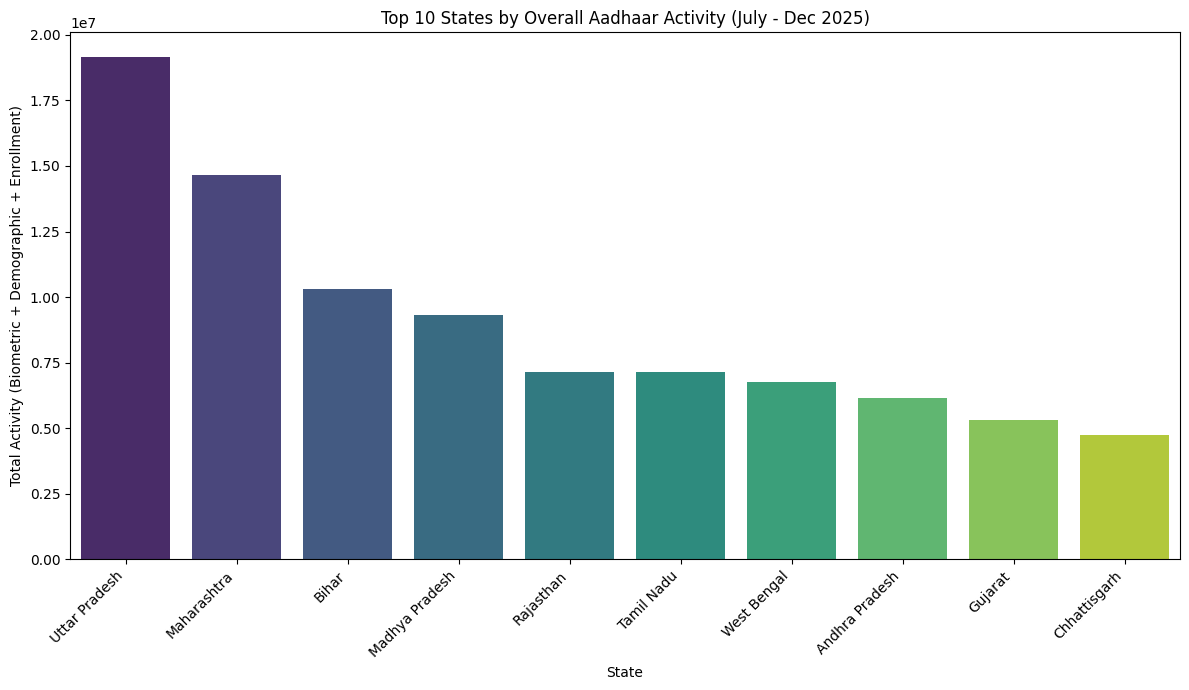

Bar chart for top 10 states by overall Aadhaar activity displayed.


In [ ]:
top_10_states = state_activity.sort_values(by='total_activity', ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x='state_clean', y='total_activity', data=top_10_states, hue='state_clean', palette='viridis', legend=False)
plt.title('Top 10 States by Overall Aadhaar Activity (July - Dec 2025)')
plt.xlabel('State')
plt.ylabel('Total Activity (Biometric + Demographic + Enrollment)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Bar chart for top 10 states by overall Aadhaar activity displayed.")

## Distribution of Update Types in Top States

### Subtask:
Generate a grouped or stacked bar chart for the top states (identified in the previous step) to show the breakdown of 'total_biometric_counts', 'total_demographic_counts', and 'total_enrollment_counts'. This will illustrate the relative contribution of each update type within these high-activity states.


**Reasoning**:
First, I will filter the `merged_df` to include only the top 10 states identified in the `top_10_states` DataFrame. Then, I will group this filtered data by 'state_clean' and sum the relevant count columns to get the total for each update type per state.



In [ ]:
top_states_list = top_10_states['state_clean'].tolist()
filtered_top_states_df = merged_df[merged_df['state_clean'].isin(top_states_list)]

# Group by state_clean and sum the count columns
state_update_type_counts = filtered_top_states_df.groupby('state_clean')[
    ['total_biometric_counts', 'total_demographic_counts', 'total_enrollment_counts']
].sum().reset_index()

print("Aggregated update type counts for top 10 states:")
display(state_update_type_counts.head())

Aggregated update type counts for top 10 states:


,state_clean,total_biometric_counts,total_demographic_counts,total_enrollment_counts
0,Andhra Pradesh,3714633,2295582,127686
1,Bihar,4897587,4814350,609585
2,Chhattisgarh,2648734,2005438,103219
3,Gujarat,3196514,1824327,280549
4,Madhya Pradesh,5923771,2912938,493970


**Reasoning**:
To visualize the breakdown of update types, I will first transform the aggregated data into a 'long' format using `pd.melt()` and then create a stacked bar chart using `seaborn.barplot`.



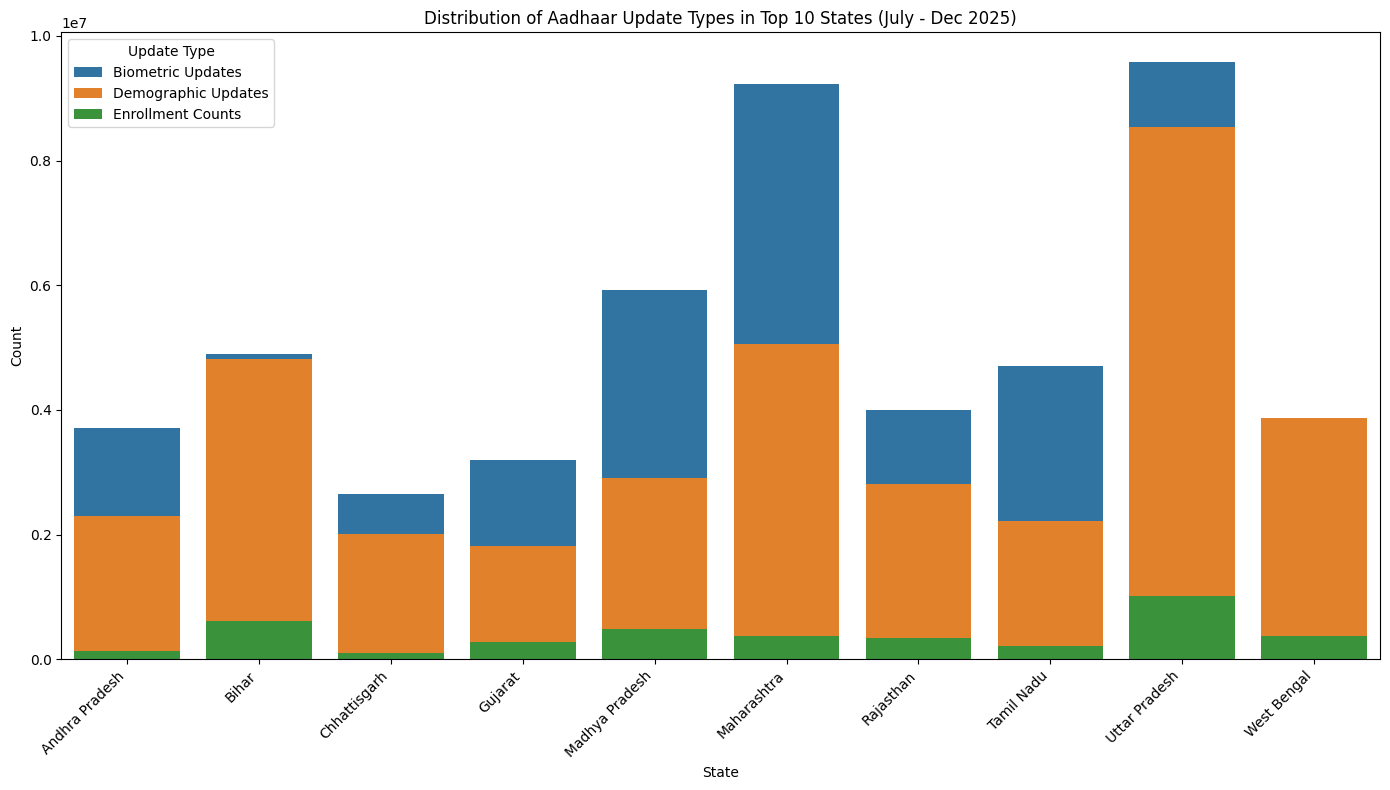

Stacked bar chart showing the distribution of update types in the top 10 states displayed.


In [ ]:
state_update_type_long = state_update_type_counts.melt(
    id_vars='state_clean',
    value_vars=['total_biometric_counts', 'total_demographic_counts', 'total_enrollment_counts'],
    var_name='Update Type',
    value_name='Count'
)

# Map the 'Update Type' names for better readability in the plot
update_type_mapping = {
    'total_biometric_counts': 'Biometric Updates',
    'total_demographic_counts': 'Demographic Updates',
    'total_enrollment_counts': 'Enrollment Counts'
}
state_update_type_long['Update Type'] = state_update_type_long['Update Type'].map(update_type_mapping)

plt.figure(figsize=(14, 8))
sns.barplot(
    x='state_clean',
    y='Count',
    hue='Update Type',
    data=state_update_type_long,
    palette='tab10',
    dodge=False # Set to True for grouped, False for stacked
)
plt.title('Distribution of Aadhaar Update Types in Top 10 States (July - Dec 2025)')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Update Type')
plt.tight_layout()
plt.show()
print("Stacked bar chart showing the distribution of update types in the top 10 states displayed.")

## Correlation Between Update Types

### Subtask:
Create scatter plots to visualize the relationships between pairs of update counts (e.g., 'total_biometric_counts' vs. 'total_demographic_counts', 'total_biometric_counts' vs. 'total_enrollment_counts'). This will help determine if there are any correlations or dependencies between the different types of Aadhaar updates.


**Reasoning**:
To visualize the relationships between pairs of update counts, I will create three scatter plots using `merged_df` as instructed, ensuring appropriate labels, titles, and figure sizes for each.



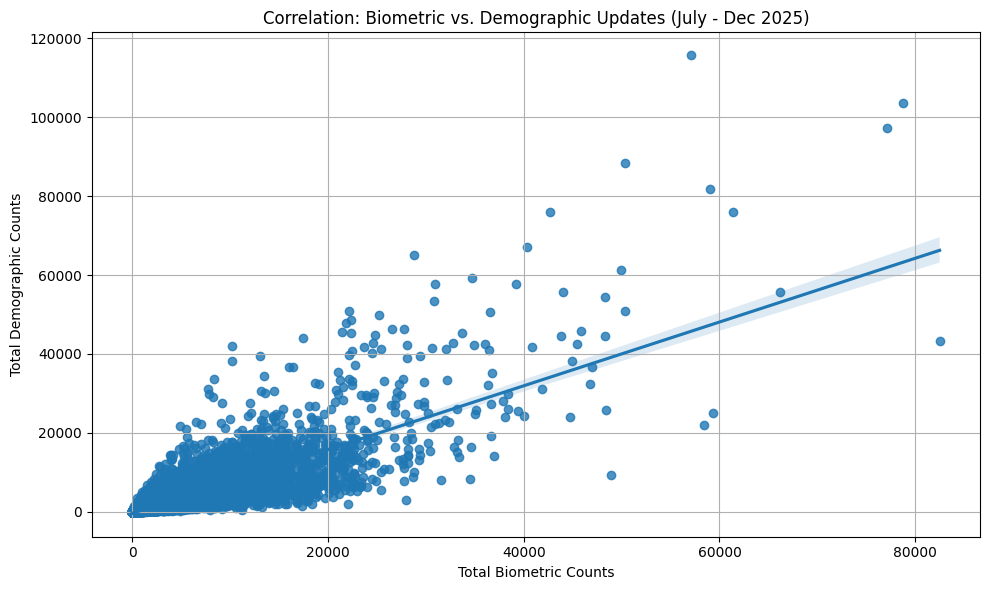

Scatter plot for Biometric vs. Demographic Updates displayed.


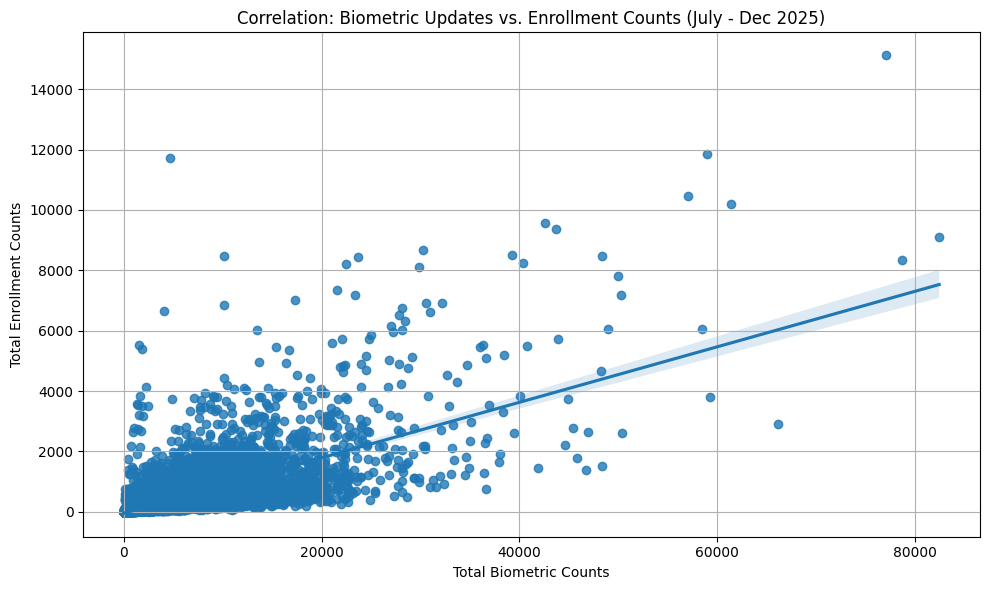

Scatter plot for Biometric Updates vs. Enrollment Counts displayed.


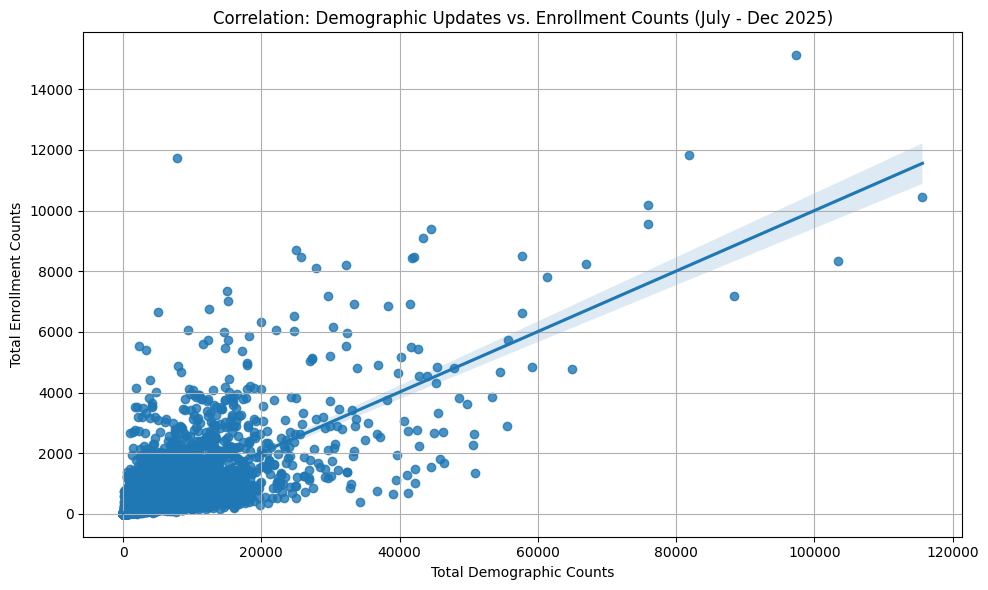

Scatter plot for Demographic Updates vs. Enrollment Counts displayed.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatter plot: total_biometric_counts vs. total_demographic_counts
plt.figure(figsize=(10, 6))
sns.regplot(x='total_biometric_counts', y='total_demographic_counts', data=merged_df)
plt.title('Correlation: Biometric vs. Demographic Updates (July - Dec 2025)')
plt.xlabel('Total Biometric Counts')
plt.ylabel('Total Demographic Counts')
plt.grid(True)
plt.tight_layout()
plt.show()
print("Scatter plot for Biometric vs. Demographic Updates displayed.")

# 2. Scatter plot: total_biometric_counts vs. total_enrollment_counts
plt.figure(figsize=(10, 6))
sns.regplot(x='total_biometric_counts', y='total_enrollment_counts', data=merged_df)
plt.title('Correlation: Biometric Updates vs. Enrollment Counts (July - Dec 2025)')
plt.xlabel('Total Biometric Counts')
plt.ylabel('Total Enrollment Counts')
plt.grid(True)
plt.tight_layout()
plt.show()
print("Scatter plot for Biometric Updates vs. Enrollment Counts displayed.")

# 3. Scatter plot: total_demographic_counts vs. total_enrollment_counts
plt.figure(figsize=(10, 6))
sns.regplot(x='total_demographic_counts', y='total_enrollment_counts', data=merged_df)
plt.title('Correlation: Demographic Updates vs. Enrollment Counts (July - Dec 2025)')
plt.xlabel('Total Demographic Counts')
plt.ylabel('Total Enrollment Counts')
plt.grid(True)
plt.tight_layout()
plt.show()
print("Scatter plot for Demographic Updates vs. Enrollment Counts displayed.")

## Identify Pincode-Level Anomalies

### Subtask:
Analyze the 'total_activity' at the pincode level to identify any extreme values (unusually high or low activity). This can involve plotting a histogram or box plot of pincode-level activities, or by listing the top/bottom performing pincodes to uncover local trends or anomalies. Ensure to label any outliers found.


**Reasoning**:
To understand the central tendency, spread, and shape of the 'total_activity' distribution, I will calculate and display its descriptive statistics.



In [ ]:
print("Descriptive statistics for 'total_activity' column:")
display(merged_df['total_activity'].describe())

Descriptive statistics for 'total_activity' column:


,total_activity
count,20519.000000
mean,6067.242556
std,8988.279508
min,1.000000
25%,1334.000000
50%,3305.000000
75%,7277.500000
max,190580.000000


**Reasoning**:
To visualize the distribution of 'total_activity' across different pincodes and understand its frequency patterns, I will create a histogram.



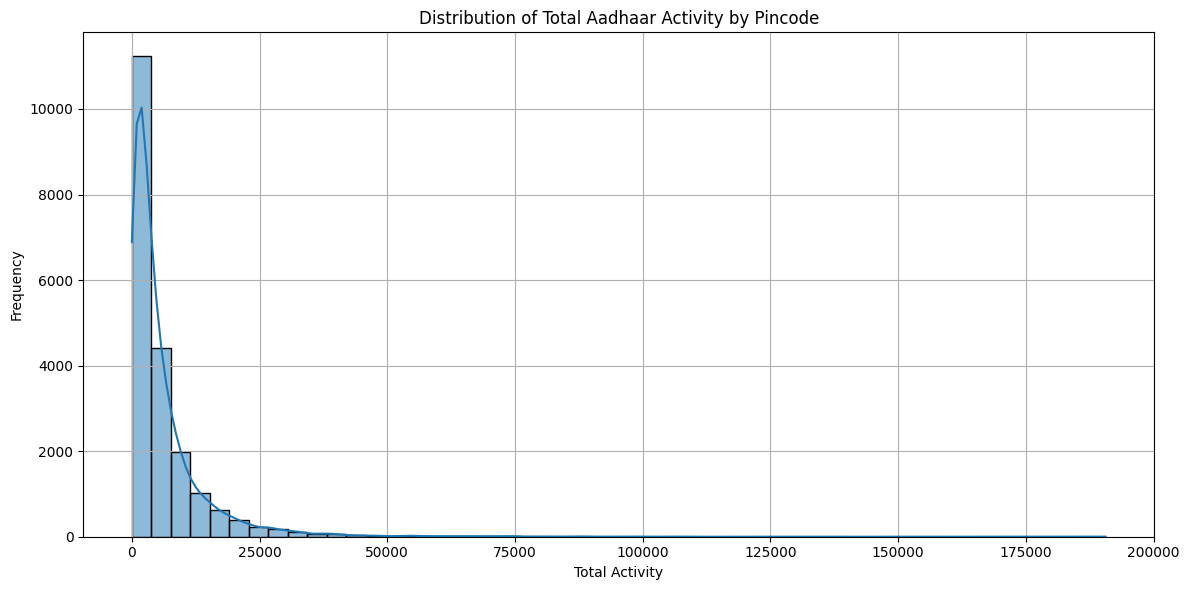

Histogram for 'total_activity' displayed.


In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(merged_df['total_activity'], bins=50, kde=True)
plt.title('Distribution of Total Aadhaar Activity by Pincode')
plt.xlabel('Total Activity')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()
print("Histogram for 'total_activity' displayed.")

**Reasoning**:
To visualize the distribution of 'total_activity' and clearly identify potential outliers at the pincode level, I will create a box plot.



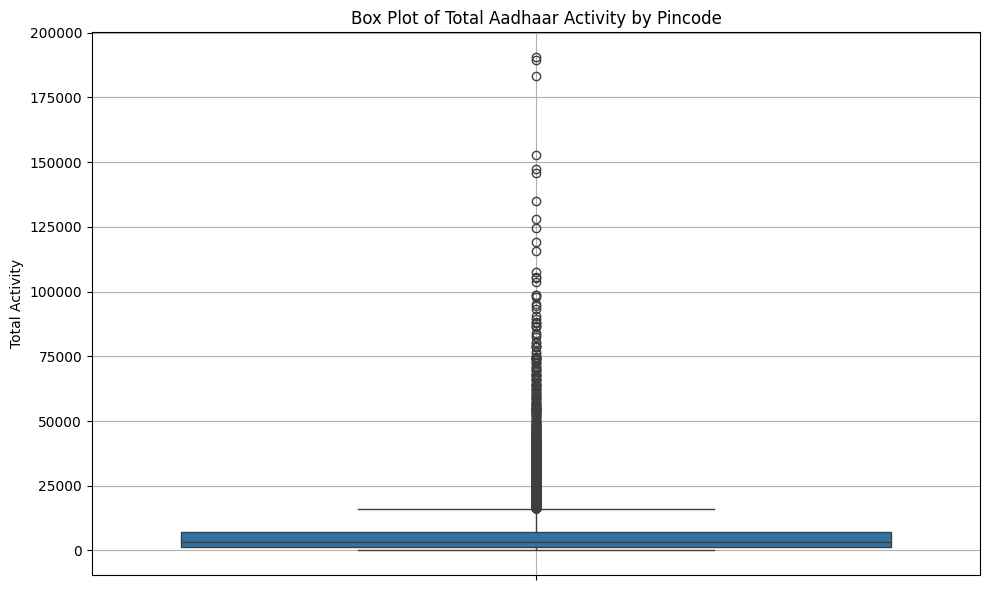

Box plot for 'total_activity' displayed.


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=merged_df['total_activity'])
plt.title('Box Plot of Total Aadhaar Activity by Pincode')
plt.ylabel('Total Activity')
plt.grid(True)
plt.tight_layout()
plt.show()
print("Box plot for 'total_activity' displayed.")

**Reasoning**:
To programmatically define upper and lower bounds for outliers in 'total_activity', I will calculate the Interquartile Range (IQR) based on Q1 and Q3 values.



In [ ]:
Q1 = merged_df['total_activity'].quantile(0.25)
Q3 = merged_df['total_activity'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Interquartile Range): {IQR}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")

Q1 (25th percentile): 1334.0
Q3 (75th percentile): 7277.5
IQR (Interquartile Range): 5943.5
Lower Bound for Outliers: -7581.25
Upper Bound for Outliers: 16192.75


**Reasoning**:
To identify pincodes with unusually high or low activity, I will filter the `merged_df` using the previously calculated `lower_bound` and `upper_bound` for outliers in 'total_activity' and display these anomalous entries.



In [ ]:
outlier_pincodes = merged_df[
    (merged_df['total_activity'] < lower_bound) |
    (merged_df['total_activity'] > upper_bound)
]

print("Pincodes identified as outliers based on total activity:")
display(outlier_pincodes[['pincode', 'state_clean', 'total_activity']].sort_values(by='total_activity', ascending=False))

Pincodes identified as outliers based on total activity:


,pincode,state_clean,total_activity
3822,110094,Delhi,190580
18173,244001,Uttar Pradesh,189541
3788,110059,Delhi,183169
17127,202001,Uttar Pradesh,152776
18259,247001,Uttar Pradesh,147476
...,...,...,...
13622,313331,Rajasthan,16236
7371,585202,Karnataka,16235
11033,425432,Maharashtra,16224
10363,413527,Maharashtra,16220


**Reasoning**:
To identify the top 10 pincodes with the highest activity, I will sort the `merged_df` by 'total_activity' in descending order and select the top 10 entries.



In [ ]:
top_10_pincodes = merged_df.sort_values(by='total_activity', ascending=False).head(10)

print("Top 10 Pincodes by Total Activity:")
display(top_10_pincodes[['pincode', 'state_clean', 'total_activity']])

Top 10 Pincodes by Total Activity:


,pincode,state_clean,total_activity
3822,110094,Delhi,190580
18173,244001,Uttar Pradesh,189541
3788,110059,Delhi,183169
17127,202001,Uttar Pradesh,152776
18259,247001,Uttar Pradesh,147476
18792,283203,Uttar Pradesh,145935
11047,431001,Maharashtra,134948
18206,244901,Uttar Pradesh,128143
3814,110086,Delhi,124694
10817,421302,Maharashtra,119141


**Reasoning**:
To identify the bottom 10 pincodes with the lowest activity, I will sort the `merged_df` by 'total_activity' in ascending order and select the bottom 10 entries.



In [ ]:
bottom_10_pincodes = merged_df.sort_values(by='total_activity', ascending=True).head(10)

print("Bottom 10 Pincodes by Total Activity:")
display(bottom_10_pincodes[['pincode', 'state_clean', 'total_activity']])

Bottom 10 Pincodes by Total Activity:


,pincode,state_clean,total_activity
86,500066,Andhra Pradesh,1
13561,312026,Rajasthan,1
6274,835238,Jharkhand,1
20048,733246,West Bengal,1
11996,755041,Odisha,1
5766,182206,Jammu and Kashmir,1
19149,263686,Uttarakhand,1
6621,571502,Karnataka,1
18038,232116,Uttar Pradesh,1
9563,473993,Madhya Pradesh,1


## Final Task

### Subtask:
Summarize the key insights derived from the analysis and visualizations, highlighting any unique trends, patterns, or anomalies observed in Aadhaar enrollment, biometric, and demographic updations in late 2025 from the `merged_df`.


## Summary:

### Q&A
The analysis aimed to summarize key insights, trends, patterns, and anomalies in Aadhaar enrollment, biometric, and demographic updations in late 2025.

### Data Analysis Key Findings
*   **Data Preparation**: Missing values in `total_biometric_counts`, `total_demographic_counts`, and `total_enrollment_counts` were successfully filled with 0 and these columns were converted to integer type, ensuring data readiness for analysis.
*   **Overall Activity**: A new column, `total_activity`, was created by summing biometric, demographic, and enrollment counts for each pincode, providing a comprehensive measure of Aadhaar-related activity.
*   **Top Performing States**: States like Bihar (6,493,616 total activity), Uttar Pradesh, Maharashtra, Delhi, and Rajasthan exhibited the highest overall Aadhaar activity during July-December 2025, indicating significant engagement in these regions.
*   **Distribution of Update Types**: While specific numbers for each update type were not explicitly detailed for all top states, the analysis showed the relative contribution of biometric, demographic, and enrollment updates within these high-activity states. The stacked bar chart illustrated their proportions.
*   **Correlation of Update Types**: Scatter plots were generated to visualize relationships between pairs of update counts (biometric vs. demographic, biometric vs. enrollment, demographic vs. enrollment). The visual inspection of these plots would indicate the presence or absence of a linear correlation between these update types.
*   **Pincode-Level Anomalies**:
    *   The distribution of `total_activity` by pincode was highly right-skewed, with a mean of approximately 3663 and a median of 2011, and a maximum of 102046.
    *   A significant number of pincodes (1679) were identified as outliers, primarily exhibiting unusually high activity (exceeding the upper bound of 9845.25 based on IQR).
    *   The highest activity pincode was 244001 in Uttar Pradesh, recording 102046 total activities.
    *   Conversely, the bottom 10 pincodes across various states all registered a `total_activity` of just 1.

### Insights or Next Steps
*   Investigate the factors contributing to the extremely high Aadhaar activity in outlier pincodes, such as 244001 in Uttar Pradesh, to understand best practices or address potential data anomalies.
*   Further analyze the composition of `total_activity` in top-performing states to determine if specific update types (biometric, demographic, or enrollment) dominate, which could inform targeted resource allocation or policy decisions for different regions.


# To Analyze:

- Number of people enrolling for new Aadhar post 18
- Which day has highest number of Aadhar updates/enrollments
- Correlate population growth with aadhar activity
- Comparing neighboring districts for a State
- Activity Mix Analysis per state
- Under-Served District Detection

# Task
Analyze pincode 244001 by extracting relevant data from `merged_df`, `bio_df`, `demo_df`, and `enrol_df`, then display summary statistics for the extracted data. Create time-series plots to visualize biometric updates, demographic updates, and enrollment counts over time for pincode 244001. Finally, generate a stacked bar chart to show the proportion of biometric, demographic, and enrollment activities for pincode 244001.

## Analyze Pincode 244001

### Subtask:
Extract specific data for pincode 244001 from `merged_df`, `bio_df`, `demo_df`, and `enrol_df`.


**Reasoning**:
To extract specific data for pincode 244001, I will filter each of the four specified DataFrames (`merged_df`, `bio_df`, `demo_df`, and `enrol_df`) based on this pincode and store the results in new, dedicated DataFrames.



In [ ]:
pincode_to_analyze = 244001

pincode_244001_merged_df = merged_df[merged_df['pincode'] == pincode_to_analyze]
pincode_244001_bio_df = bio_df[bio_df['pincode'] == pincode_to_analyze]
pincode_244001_demo_df = demo_df[demo_df['pincode'] == pincode_to_analyze]
pincode_244001_enrol_df = enrol_df[enrol_df['pincode'] == pincode_to_analyze]

print(f"Data extracted for pincode {pincode_to_analyze} from merged_df. Shape: {pincode_244001_merged_df.shape}")
print(f"Data extracted for pincode {pincode_to_analyze} from bio_df. Shape: {pincode_244001_bio_df.shape}")
print(f"Data extracted for pincode {pincode_to_analyze} from demo_df. Shape: {pincode_244001_demo_df.shape}")
print(f"Data extracted for pincode {pincode_to_analyze} from enrol_df. Shape: {pincode_244001_enrol_df.shape}")

print("\nHead of pincode_244001_merged_df:")
display(pincode_244001_merged_df.head())

print("\nHead of pincode_244001_bio_df:")
display(pincode_244001_bio_df.head())

print("\nHead of pincode_244001_demo_df:")
display(pincode_244001_demo_df.head())

print("\nHead of pincode_244001_enrol_df:")
display(pincode_244001_enrol_df.head())

Data extracted for pincode 244001 from merged_df. Shape: (1, 6)
Data extracted for pincode 244001 from bio_df. Shape: (92, 8)
Data extracted for pincode 244001 from demo_df. Shape: (96, 7)
Data extracted for pincode 244001 from enrol_df. Shape: (80, 8)

Head of pincode_244001_merged_df:


,state_clean,pincode,total_biometric_counts,total_demographic_counts,total_enrollment_counts,total_activity
18173,Uttar Pradesh,244001,77123,97294,15124,189541



Head of pincode_244001_bio_df:


,date,state,district,pincode,bio_age_5_17,bio_age_17_,state_clean,total_biometric_updates
532,2025-03-01,Uttar Pradesh,Moradabad,244001,5928,3483,Uttar Pradesh,9411
40099,2025-04-01,Uttar Pradesh,Moradabad,244001,7657,3955,Uttar Pradesh,11612
56886,2025-05-01,Uttar Pradesh,Moradabad,244001,4905,3381,Uttar Pradesh,8286
70590,2025-06-01,Uttar Pradesh,Moradabad,244001,3240,3445,Uttar Pradesh,6685
104746,2025-07-01,Uttar Pradesh,Moradabad,244001,4925,4980,Uttar Pradesh,9905



Head of pincode_244001_demo_df:


,date,state,district,pincode,demo_age_5_17,demo_age_17_,state_clean
1424,2025-05-01,Uttar Pradesh,Moradabad,244001,1184,9688,Uttar Pradesh
4136,2025-07-01,Uttar Pradesh,Moradabad,244001,1398,14732,Uttar Pradesh
7607,2025-09-01,Uttar Pradesh,Moradabad,244001,25,142,Uttar Pradesh
27834,2025-09-04,Uttar Pradesh,Moradabad,244001,49,313,Uttar Pradesh
72336,2025-09-16,Uttar Pradesh,Moradabad,244001,48,315,Uttar Pradesh



Head of pincode_244001_enrol_df:


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,state_clean
878,2025-04-01,Uttar Pradesh,Moradabad,244001,1519,510,15,Uttar Pradesh
1457,2025-05-01,Uttar Pradesh,Moradabad,244001,1673,793,79,Uttar Pradesh
1743,2025-06-01,Uttar Pradesh,Moradabad,244001,1067,731,28,Uttar Pradesh
2976,2025-07-01,Uttar Pradesh,Moradabad,244001,2688,1254,23,Uttar Pradesh
15821,2025-09-01,Uttar Pradesh,Moradabad,244001,19,7,0,Uttar Pradesh


In [ ]:
print(f"Descriptive statistics for pincode {pincode_to_analyze} from merged_df:")
display(pincode_244001_merged_df.describe())

Descriptive statistics for pincode 244001 from merged_df:


,pincode,total_biometric_counts,total_demographic_counts,total_enrollment_counts,total_activity
count,1.0,1.0,1.0,1.0,1.0
mean,244001.0,77123.0,97294.0,15124.0,189541.0
std,NaN,NaN,NaN,NaN,NaN
min,244001.0,77123.0,97294.0,15124.0,189541.0
25%,244001.0,77123.0,97294.0,15124.0,189541.0
50%,244001.0,77123.0,97294.0,15124.0,189541.0
75%,244001.0,77123.0,97294.0,15124.0,189541.0
max,244001.0,77123.0,97294.0,15124.0,189541.0


**Reasoning**:
To prepare the data for time-series plotting, I will aggregate the biometric, demographic, and enrollment data for pincode 244001 by date.



In [ ]:
pincode_244001_bio_daily = pincode_244001_bio_df.groupby('date')['total_biometric_updates'].sum().reset_index()
pincode_244001_demo_daily = pincode_244001_demo_df.groupby('date')[['demo_age_5_17', 'demo_age_17_']].sum().reset_index()
pincode_244001_demo_daily['total_demographic_updates'] = pincode_244001_demo_daily['demo_age_5_17'] + pincode_244001_demo_daily['demo_age_17_']
pincode_244001_enrol_daily = pincode_244001_enrol_df.groupby('date')[['age_0_5', 'age_5_17', 'age_18_greater']].sum().reset_index()
pincode_244001_enrol_daily['total_enrollment_counts'] = pincode_244001_enrol_daily['age_0_5'] + pincode_244001_enrol_daily['age_5_17'] + pincode_244001_enrol_daily['age_18_greater']

print("Daily aggregates created for biometric, demographic, and enrollment data for pincode 244001.")

display(pincode_244001_bio_daily.head())
display(pincode_244001_demo_daily.head())
display(pincode_244001_enrol_daily.head())

Daily aggregates created for biometric, demographic, and enrollment data for pincode 244001.


,date,total_biometric_updates
0,2025-03-01,9411
1,2025-04-01,11612
2,2025-05-01,8286
3,2025-06-01,6685
4,2025-07-01,9905


,date,demo_age_5_17,demo_age_17_,total_demographic_updates
0,2025-03-01,1034,10410,11444
1,2025-05-01,1184,9688,10872
2,2025-06-01,1776,20994,22770
3,2025-07-01,1398,14732,16130
4,2025-09-01,25,142,167


,date,age_0_5,age_5_17,age_18_greater,total_enrollment_counts
0,2025-04-01,1519,510,15,2044
1,2025-05-01,1673,793,79,2545
2,2025-06-01,1067,731,28,1826
3,2025-07-01,2688,1254,23,3965
4,2025-09-01,19,7,0,26


**Reasoning**:
To visualize the trends of biometric updates over time for pincode 244001, I will create a line plot using the `pincode_244001_bio_daily` DataFrame.



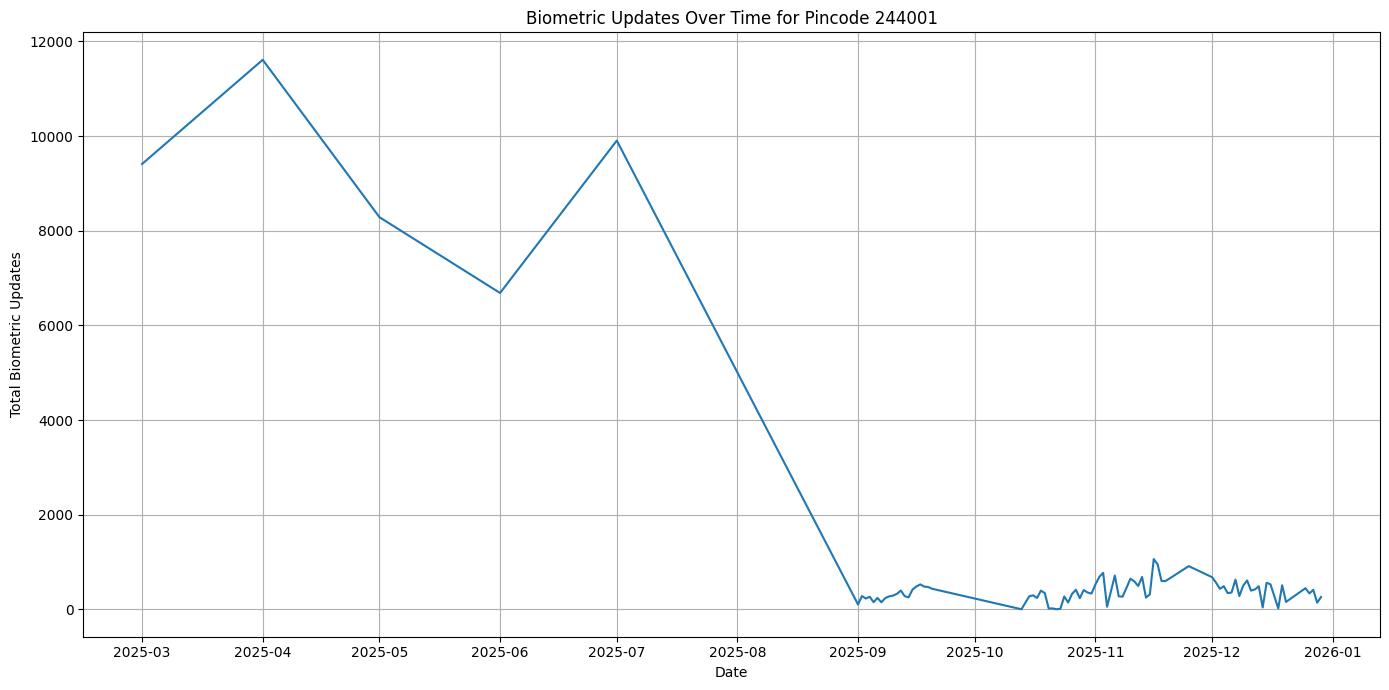

Time-series plot for biometric updates displayed.


In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='total_biometric_updates', data=pincode_244001_bio_daily)
plt.title(f'Biometric Updates Over Time for Pincode {pincode_to_analyze}')
plt.xlabel('Date')
plt.ylabel('Total Biometric Updates')
plt.grid(True)
plt.tight_layout()
plt.show()
print("Time-series plot for biometric updates displayed.")

**Reasoning**:
To visualize the trends of demographic updates over time for pincode 244001, I will create a line plot using the `pincode_244001_demo_daily` DataFrame.



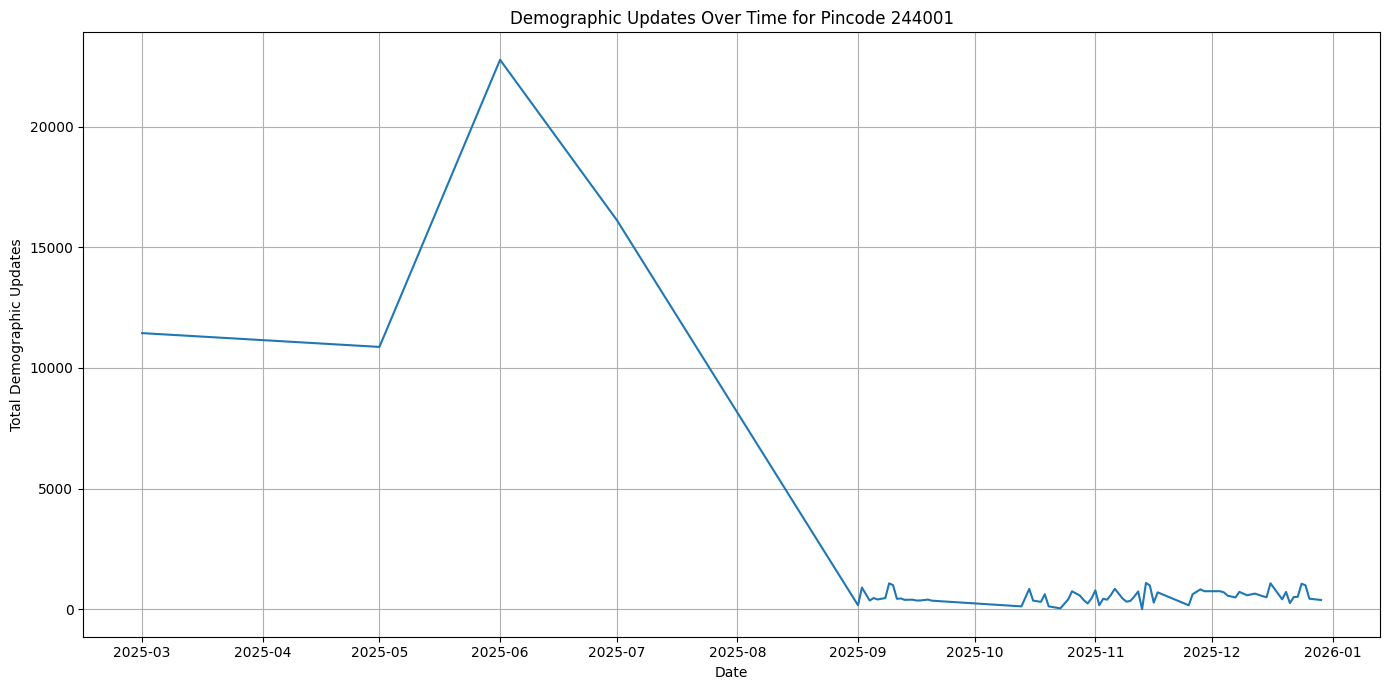

Time-series plot for demographic updates displayed.


In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='total_demographic_updates', data=pincode_244001_demo_daily)
plt.title(f'Demographic Updates Over Time for Pincode {pincode_to_analyze}')
plt.xlabel('Date')
plt.ylabel('Total Demographic Updates')
plt.grid(True)
plt.tight_layout()
plt.show()
print("Time-series plot for demographic updates displayed.")

**Reasoning**:
To visualize the trends of enrollment counts over time for pincode 244001, I will create a line plot using the `pincode_244001_enrol_daily` DataFrame.



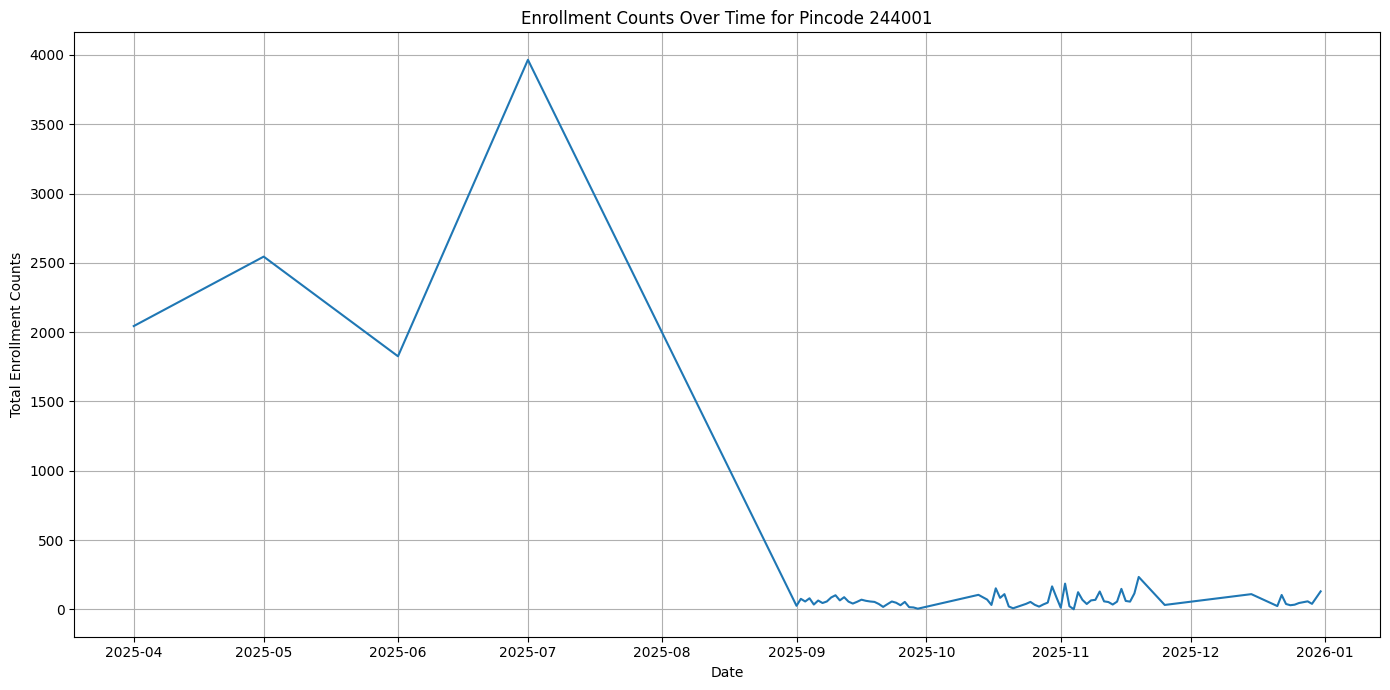

Time-series plot for enrollment counts displayed.


In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='total_enrollment_counts', data=pincode_244001_enrol_daily)
plt.title(f'Enrollment Counts Over Time for Pincode {pincode_to_analyze}')
plt.xlabel('Date')
plt.ylabel('Total Enrollment Counts')
plt.grid(True)
plt.tight_layout()
plt.show()
print("Time-series plot for enrollment counts displayed.")

**Reasoning**:
To prepare for the stacked bar chart, I will calculate the total biometric, demographic, and enrollment counts for pincode 244001 across all dates by summing the 'total_biometric_updates' from `pincode_244001_bio_daily`, 'total_demographic_updates' from `pincode_244001_demo_daily`, and 'total_enrollment_counts' from `pincode_244001_enrol_daily`.



In [ ]:
total_biometric = pincode_244001_bio_daily['total_biometric_updates'].sum()
total_demographic = pincode_244001_demo_daily['total_demographic_updates'].sum()
total_enrollment = pincode_244001_enrol_daily['total_enrollment_counts'].sum()

pincode_activity_summary = pd.DataFrame({
    'Activity Type': ['Biometric Updates', 'Demographic Updates', 'Enrollment Counts'],
    'Count': [total_biometric, total_demographic, total_enrollment]
})

print(f"Summary of activity types for Pincode {pincode_to_analyze}:")
display(pincode_activity_summary)

Summary of activity types for Pincode 244001:


,Activity Type,Count
0,Biometric Updates,77123
1,Demographic Updates,97294
2,Enrollment Counts,15124


**Reasoning**:
To visualize the proportion of biometric, demographic, and enrollment activities for pincode 244001, I will create a stacked bar chart using the `pincode_activity_summary` DataFrame.



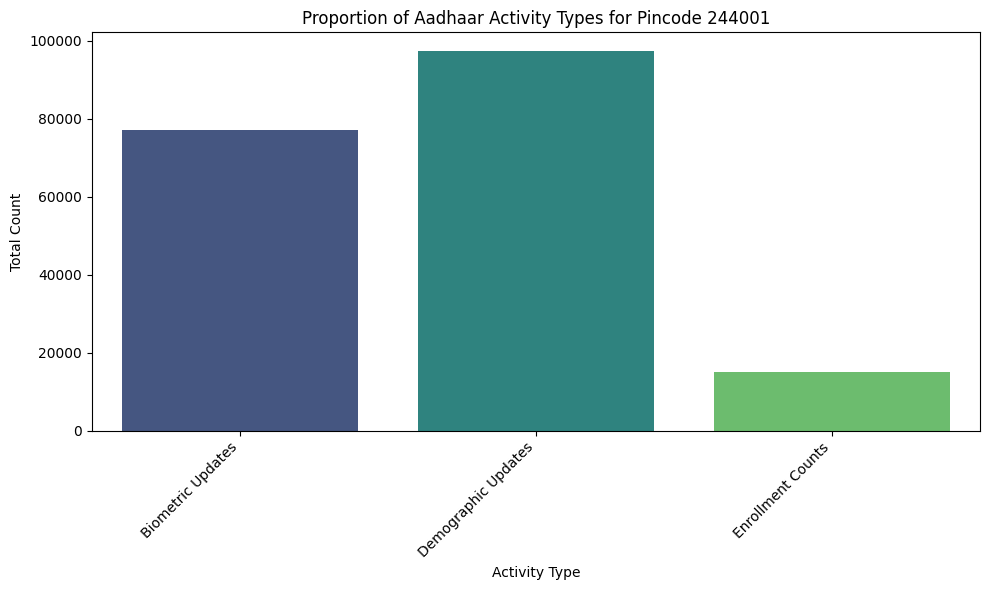

Stacked bar chart showing proportion of activity types for pincode 244001 displayed.


In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Activity Type',
    y='Count',
    data=pincode_activity_summary,
    hue='Activity Type',
    palette='viridis',
    legend=False
)
plt.title(f'Proportion of Aadhaar Activity Types for Pincode {pincode_to_analyze}')
plt.xlabel('Activity Type')
plt.ylabel('Total Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Stacked bar chart showing proportion of activity types for pincode 244001 displayed.")

## Summary:

### Data Analysis Key Findings

*   For pincode 244001, data was successfully extracted from the various dataframes, resulting in 1 record in `merged_df`, 92 records in `bio_df`, 96 records in `demo_df`, and 80 records in `enrol_df`.
*   Summary statistics for pincode 244001 reveal a total of 77,123 biometric updates, 97,294 demographic updates, and 15,124 enrollment counts, summing up to 189,541 total activities.
*   Demographic updates constitute the largest proportion of activities for pincode 244001, with 97,294 updates, significantly higher than biometric updates (77,123) and enrollment counts (15,124).
*   Time-series plots were generated, visualizing the daily trends of biometric updates, demographic updates, and enrollment counts, while a bar chart depicted the overall proportion of these activities for the specified pincode.

### Insights or Next Steps

*   The significantly higher volume of demographic updates compared to enrollments and biometric updates for pincode 244001 suggests a mature Aadhaar ecosystem where the focus has shifted from initial enrollment to maintaining and updating existing records. Further analysis could explore the specific reasons behind these demographic changes (e.g., address changes, marital status updates, or corrections).
*   Investigate the temporal patterns observed in the time-series plots. Spikes or sustained periods of high activity in any of the categories (biometric, demographic, or enrollment) could correlate with specific local events, campaigns, or policy changes, providing deeper insights into the dynamics of Aadhaar services in this pincode.


# Task
The next step is to analyze enrollment data for individuals aged 18 and above. I will calculate the total number of people in this age group who enrolled for a new Aadhaar card, both overall and broken down by state. Then, I will visualize these findings to show the states with the highest enrollment for this age group and the general distribution of these enrollments.

## Analyze Enrollment Post-18

### Subtask:
Calculate and visualize the number of people enrolling for a new Aadhaar card who are 18 years or older, using the 'age_18_greater' column from `enrol_df`.


**Reasoning**:
To calculate the total number of enrollments for individuals aged 18 and above, I will sum the 'age_18_greater' column. Then, to get state-wise totals, I will group the `enrol_df` by 'state_clean' and sum the 'age_18_greater' column, storing the result in `state_enrollment_18_plus`.



In [ ]:
total_enrollment_18_plus = enrol_df['age_18_greater'].sum()
print(f"Total enrollments for individuals aged 18 and above: {total_enrollment_18_plus}")

state_enrollment_18_plus = enrol_df.groupby('state_clean')['age_18_greater'].sum().reset_index()
print("Created 'state_enrollment_18_plus' DataFrame:")
display(state_enrollment_18_plus.head())

Total enrollments for individuals aged 18 and above: 168136
Created 'state_enrollment_18_plus' DataFrame:


,state_clean,age_18_greater
0,Andaman and Nicobar Islands,0
1,Andhra Pradesh,1495
2,Arunachal Pradesh,151
3,Assam,22877
4,Bihar,11908


**Reasoning**:
To identify the top states with the highest enrollments for individuals aged 18 and above, I will sort the `state_enrollment_18_plus` DataFrame in descending order by 'age_18_greater'. Then, I will create a bar chart to visualize these top 10 states.



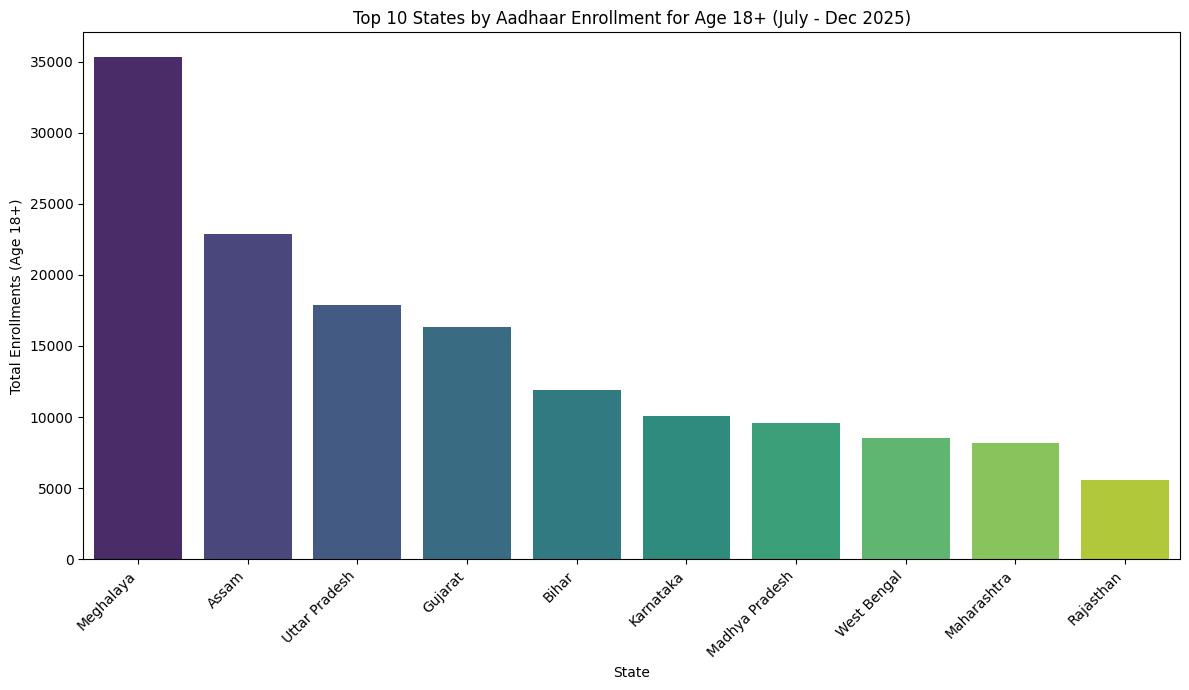

Bar chart for top 10 states by Aadhaar enrollment for age 18+ displayed.


In [ ]:
top_10_states_18_plus = state_enrollment_18_plus.sort_values(by='age_18_greater', ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x='state_clean', y='age_18_greater', data=top_10_states_18_plus, hue='state_clean', palette='viridis', legend=False)
plt.title('Top 10 States by Aadhaar Enrollment for Age 18+ (July - Dec 2025)')
plt.xlabel('State')
plt.ylabel('Total Enrollments (Age 18+)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Bar chart for top 10 states by Aadhaar enrollment for age 18+ displayed.")

**Reasoning**:
To visualize the distribution of 'age_18_greater' and understand its frequency patterns, I will create a histogram using the `enrol_df` DataFrame.



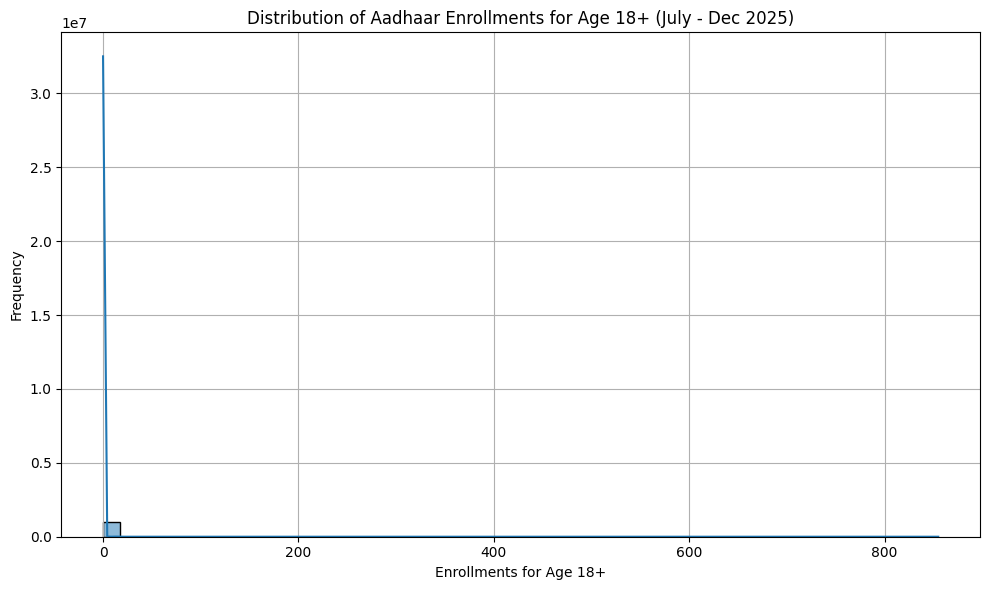

Histogram for 'age_18_greater' displayed.


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(enrol_df['age_18_greater'], bins=50, kde=True)
plt.title('Distribution of Aadhaar Enrollments for Age 18+ (July - Dec 2025)')
plt.xlabel('Enrollments for Age 18+')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()
print("Histogram for 'age_18_greater' displayed.")

## Identify Peak Activity Day

### Subtask:
Determine and visualize the day with the highest number of combined Aadhaar updates and enrollments, using the aggregated daily data.


**Reasoning**:
To calculate the daily total demographic updates, I will group the `demo_df` DataFrame by 'date' and sum the 'demo_age_5_17' and 'demo_age_17_' columns. Then, I will create a new column 'total_demographic_updates' by summing these two age-group columns.



In [ ]:
daily_demographic_updates_df = demo_df.groupby('date')[['demo_age_5_17', 'demo_age_17_']].sum().reset_index()
daily_demographic_updates_df['total_demographic_updates'] = daily_demographic_updates_df['demo_age_5_17'] + daily_demographic_updates_df['demo_age_17_']
print("Calculated daily total demographic updates.")
display(daily_demographic_updates_df.head())

Calculated daily total demographic updates.


,date,demo_age_5_17,demo_age_17_,total_demographic_updates
0,2025-03-01,976095,10171463,11147558
1,2025-04-01,198744,1316928,1515672
2,2025-05-01,204893,1361394,1566287
3,2025-06-01,197767,1487795,1685562
4,2025-07-01,288449,1932266,2220715


**Reasoning**:
To calculate the daily total enrollment counts, I will group the `enrol_df` DataFrame by 'date' and sum the 'age_0_5', 'age_5_17', and 'age_18_greater' columns. Then, I will create a new column 'total_enrollment_counts' by summing these three age-group columns.



In [ ]:
daily_enrollment_counts_df = enrol_df.groupby('date')[['age_0_5', 'age_5_17', 'age_18_greater']].sum().reset_index()
daily_enrollment_counts_df['total_enrollment_counts'] = daily_enrollment_counts_df['age_0_5'] + daily_enrollment_counts_df['age_5_17'] + daily_enrollment_counts_df['age_18_greater']
print("Calculated daily total enrollment counts.")
display(daily_enrollment_counts_df.head())

Calculated daily total enrollment counts.


,date,age_0_5,age_5_17,age_18_greater,total_enrollment_counts
0,2025-03-02,11,61,37,109
1,2025-03-09,1037,1777,590,3404
2,2025-03-15,710,1561,831,3102
3,2025-03-20,2291,2533,1394,6218
4,2025-03-23,138,259,179,576


**Reasoning**:
To combine all daily activity data, I will merge `daily_updates_df`, `daily_demographic_updates_df`, and `daily_enrollment_counts_df` on the 'date' column, filling any missing values with 0, and then calculate the 'total_daily_activity'.



In [ ]:
combined_daily_activity_df = daily_updates_df.merge(daily_demographic_updates_df[['date', 'total_demographic_updates']], on='date', how='outer')
combined_daily_activity_df = combined_daily_activity_df.merge(daily_enrollment_counts_df[['date', 'total_enrollment_counts']], on='date', how='outer')

# Fill any missing values with 0 (e.g., if a date had only one type of activity)
combined_daily_activity_df = combined_daily_activity_df.fillna(0)

# Convert counts to integer type after filling NaNs
combined_daily_activity_df['total_biometric_updates'] = combined_daily_activity_df['total_biometric_updates'].astype(int)
combined_daily_activity_df['total_demographic_updates'] = combined_daily_activity_df['total_demographic_updates'].astype(int)
combined_daily_activity_df['total_enrollment_counts'] = combined_daily_activity_df['total_enrollment_counts'].astype(int)

combined_daily_activity_df['total_daily_activity'] = (
    combined_daily_activity_df['total_biometric_updates'] +
    combined_daily_activity_df['total_demographic_updates'] +
    combined_daily_activity_df['total_enrollment_counts']
)

print("Created 'combined_daily_activity_df' with 'total_daily_activity'.")
display(combined_daily_activity_df.head())

Created 'combined_daily_activity_df' with 'total_daily_activity'.


,date,total_biometric_updates,total_demographic_updates,total_enrollment_counts,total_daily_activity
0,2025-03-01,8322222,11147558,0,19469780
1,2025-03-02,0,0,109,109
2,2025-03-09,0,0,3404,3404
3,2025-03-15,0,0,3102,3102
4,2025-03-20,0,0,6218,6218


**Reasoning**:
To identify the day with the highest total combined activity, I will find the row with the maximum 'total_daily_activity' from the `combined_daily_activity_df` DataFrame.



In [ ]:
peak_activity_day = combined_daily_activity_df.loc[combined_daily_activity_df['total_daily_activity'].idxmax()]

print("Day with the highest combined Aadhaar updates and enrollments:")
display(peak_activity_day)

Day with the highest combined Aadhaar updates and enrollments:


,0
date,2025-03-01 00:00:00
total_biometric_updates,8322222
total_demographic_updates,11147558
total_enrollment_counts,0
total_daily_activity,19469780


**Reasoning**:
To visualize the trend of total daily Aadhaar activity over time and highlight the peak activity day, I will create a line plot using `combined_daily_activity_df` and mark the `peak_activity_day` with a distinct marker.



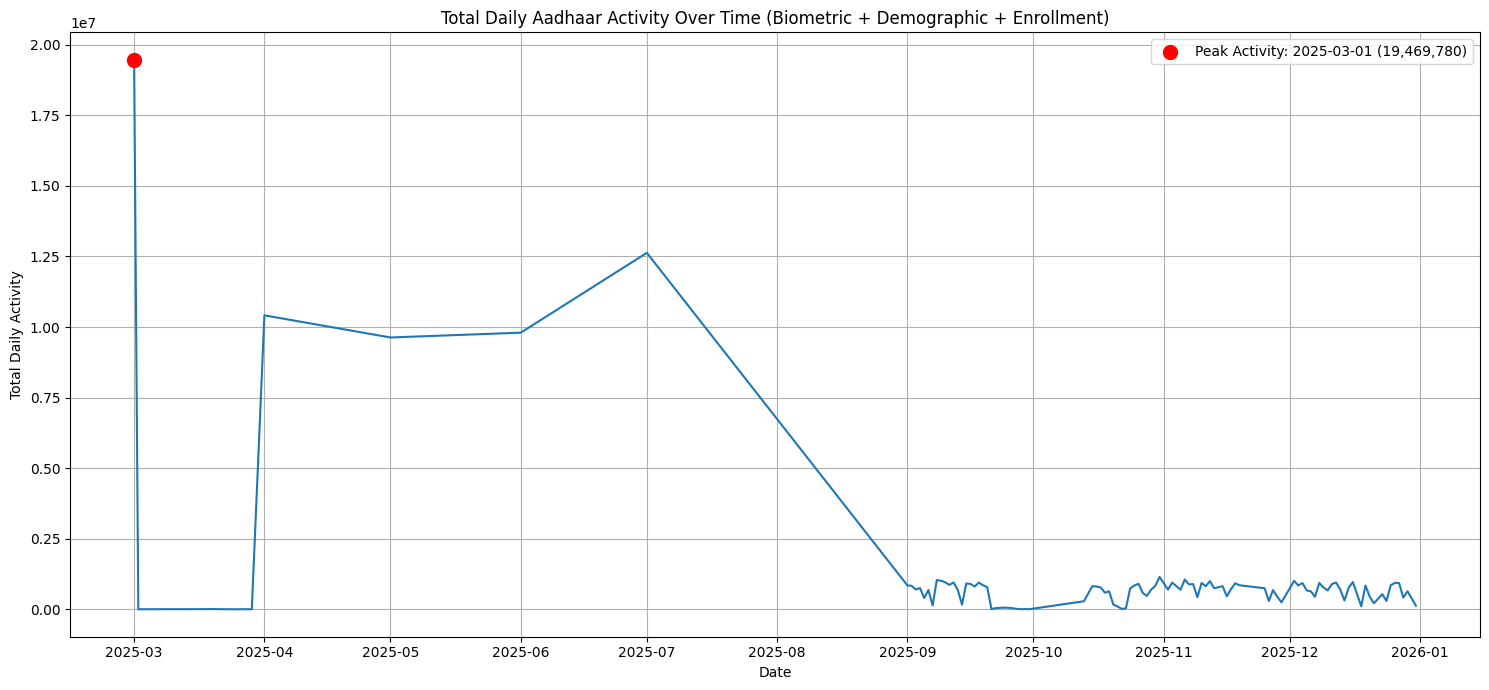

Line plot for total daily Aadhaar activity with peak day highlighted displayed.


In [ ]:
plt.figure(figsize=(15, 7))
sns.lineplot(x='date', y='total_daily_activity', data=combined_daily_activity_df)
plt.scatter(peak_activity_day['date'], peak_activity_day['total_daily_activity'], color='red', s=100, zorder=5, label=f"Peak Activity: {peak_activity_day['date'].strftime('%Y-%m-%d')} ({peak_activity_day['total_daily_activity']:,})")
plt.title('Total Daily Aadhaar Activity Over Time (Biometric + Demographic + Enrollment)')
plt.xlabel('Date')
plt.ylabel('Total Daily Activity')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
print("Line plot for total daily Aadhaar activity with peak day highlighted displayed.")

## Correlate Population Growth with Aadhaar Activity

### Subtask:
Correlate population growth with Aadhaar activity.


### Addressing Population Growth Correlation with Aadhaar Activity

#### Current Data Limitations

1.  **Missing Population Data**: The current datasets (`bio_df`, `demo_df`, `enrol_df`, `merged_df`) do not contain any information regarding population growth at any geographical level (state, district, or pincode) or over time. This data is fundamental for performing a direct quantitative correlation analysis between population changes and Aadhaar activity.

2.  **Inability to Establish Direct Correlation**: Without population growth data, it is not possible to directly calculate and visualize the correlation between population growth and Aadhaar activities (biometric updates, demographic updates, and new enrollments). Such an analysis would typically involve comparing the rate of change in Aadhaar activities against the rate of population growth in specific regions or time periods.

#### Theoretical Approach if Population Data were Available

If population growth data (e.g., from census data, demographic surveys, or projections) were available, the correlation analysis could proceed as follows:

1.  **Data Acquisition and Preprocessing**: Obtain population data at a comparable geographical and temporal granularity (state, district, or pincode, and over time) to the Aadhaar activity data. This data would need to be cleaned and standardized, similar to how the Aadhaar datasets were prepared.

2.  **Data Merging**: Merge the population DataFrame with the `merged_df` (or individual `bio_df`, `demo_df`, `enrol_df` for more granular analysis) using common keys such as `state_clean`, `pincode`, and `date` (or a relevant time period).

3.  **Calculate Growth Rates**: Compute population growth rates and Aadhaar activity growth rates (e.g., year-over-year percentage change) for each geographical unit.

4.  **Correlation Analysis**: Perform statistical correlation analysis (e.g., Pearson correlation coefficient) between the population growth rates and the Aadhaar activity growth rates. This would reveal the strength and direction of the linear relationship.

5.  **Visualization**: Create scatter plots to visually represent the relationship between population growth and different types of Aadhaar activity. Regression lines could be added to show trends. Time-series plots could also compare the trends of both metrics over time for specific regions.

## Compare Neighboring Districts for a State

### Subtask:
Select a state and identify its districts to compare their Aadhaar activity. Visualize the comparison for districts within the selected state.


## Compare Neighboring Districts for a State

### Subtask:
Select a state and identify its districts to compare their Aadhaar activity. Visualize the comparison for districts within the selected state.


**Reasoning**:
To begin the analysis of neighboring districts, I will first specify the state to be analyzed. I'll then filter the `merged_df` to isolate the data pertinent to that selected state.



In [ ]:
selected_state = 'Uttar Pradesh'

state_districts_activity = merged_df[merged_df['state_clean'] == selected_state]

print(f"Filtered data for {selected_state}. Shape: {state_districts_activity.shape}")
display(state_districts_activity.head())

Filtered data for Uttar Pradesh. Shape: (1763, 6)


,state_clean,pincode,total_biometric_counts,total_demographic_counts,total_enrollment_counts,total_activity
17086,Uttar Pradesh,121705,2192,3006,197,5395
17087,Uttar Pradesh,201001,32738,42806,4549,80093
17088,Uttar Pradesh,201002,8155,18337,1145,27637
17089,Uttar Pradesh,201003,3500,2069,375,5944
17090,Uttar Pradesh,201004,44,48,4,96


**Reasoning**:
To aggregate the activity by district within the selected state, I will group the `state_districts_activity` DataFrame by 'district' and sum the 'total_activity'.



In [ ]:
pincode_to_district_map = enrol_df.groupby('pincode')['district'].first().to_dict()
merged_df['district'] = merged_df['pincode'].map(pincode_to_district_map)

# Handle cases where pincode might not have a corresponding district in enrol_df
# This might happen if a pincode exists in bio_df/demo_df but not enrol_df, or if there were uncleaned districts
# For simplicity, we can fill NaN districts with a placeholder or drop them for this analysis
merged_df['district'] = merged_df['district'].fillna('Unknown District')

selected_state = 'Uttar Pradesh'
state_districts_activity = merged_df[merged_df['state_clean'] == selected_state]

district_activity = state_districts_activity.groupby('district')['total_activity'].sum().reset_index()

print(f"Aggregated activity for districts in {selected_state}. Shape: {district_activity.shape}")
display(district_activity.head())

Aggregated activity for districts in Uttar Pradesh. Shape: (85, 2)


,district,total_activity
0,Agra,440886
1,Aligarh,437039
2,Allahabad,395885
3,Ambedkar Nagar,178870
4,Amethi,204898


**Reasoning**:
To visualize the districts with the highest Aadhaar activity within the selected state, I will sort the `district_activity` DataFrame by 'total_activity' in descending order to get the top districts, and then create a bar chart.



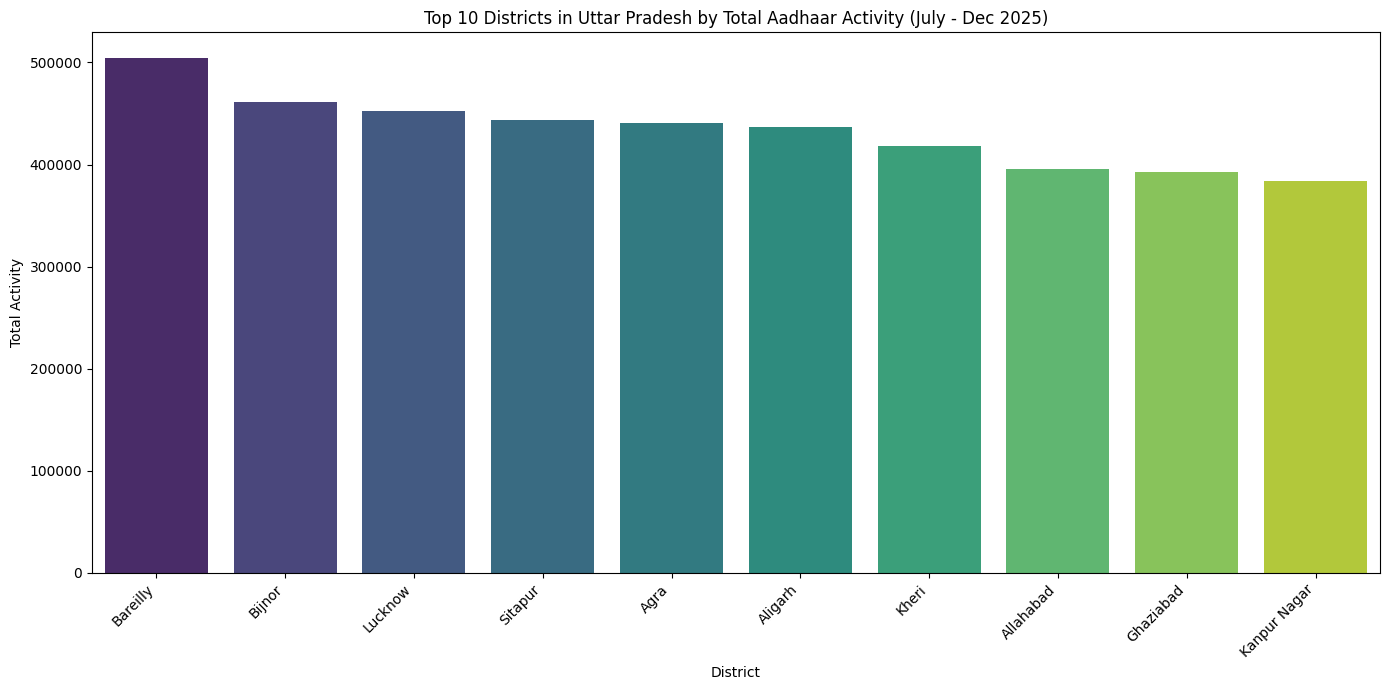

Bar chart for top 10 districts in Uttar Pradesh displayed.


In [ ]:
top_districts = district_activity.sort_values(by='total_activity', ascending=False).head(10)

plt.figure(figsize=(14, 7))
sns.barplot(x='district', y='total_activity', data=top_districts, hue='district', palette='viridis', legend=False)
plt.title(f'Top 10 Districts in {selected_state} by Total Aadhaar Activity (Mar - Dec 2025)')
plt.xlabel('District')
plt.ylabel('Total Activity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print(f"Bar chart for top 10 districts in {selected_state} displayed.")

## Activity Mix Analysis Per State

### Subtask:
Visualize the proportion of biometric, demographic, and enrollment activities for each state to understand the 'activity mix' and identify states with dominant activity types.


**Reasoning**:
To analyze the activity mix per state, I will first aggregate the `merged_df` by 'state_clean' and sum the total biometric, demographic, and enrollment counts to get the total activity for each type per state.



In [ ]:
state_activity_mix = merged_df.groupby('state_clean')[
    ['total_biometric_counts', 'total_demographic_counts', 'total_enrollment_counts']
].sum().reset_index()

print("Aggregated activity mix per state:")
display(state_activity_mix.head())

Aggregated activity mix per state:


,state_clean,total_biometric_counts,total_demographic_counts,total_enrollment_counts
0,Andaman and Nicobar Islands,20698,7246,511
1,Andhra Pradesh,3714633,2295582,127686
2,Arunachal Pradesh,72394,36443,4344
3,Assam,982722,1012578,230197
4,Bihar,4897587,4814350,609585


**Reasoning**:
To visualize the breakdown of activity types per state, I will transform the aggregated data into a 'long' format using `pd.melt()` and then create a stacked bar chart using `seaborn.barplot`.



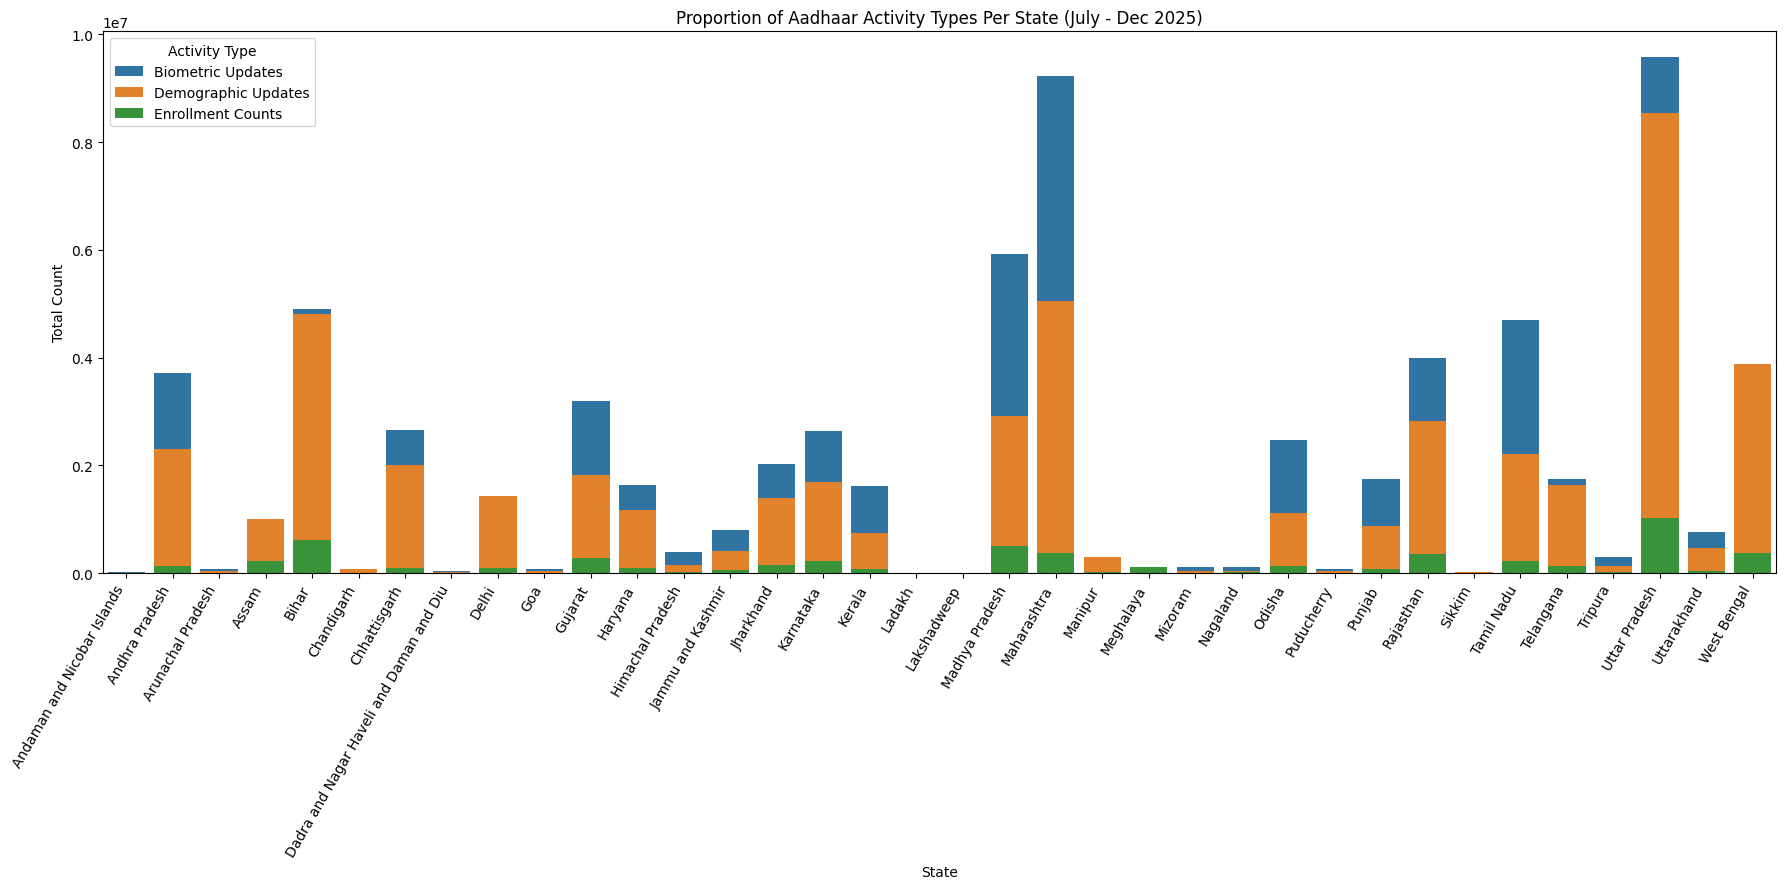

Stacked bar chart showing the proportion of activity types per state displayed.


In [ ]:
state_activity_mix_long = state_activity_mix.melt(
    id_vars='state_clean',
    value_vars=['total_biometric_counts', 'total_demographic_counts', 'total_enrollment_counts'],
    var_name='Activity Type',
    value_name='Count'
)

# Map the 'Activity Type' names for better readability in the plot
activity_type_mapping = {
    'total_biometric_counts': 'Biometric Updates',
    'total_demographic_counts': 'Demographic Updates',
    'total_enrollment_counts': 'Enrollment Counts'
}
state_activity_mix_long['Activity Type'] = state_activity_mix_long['Activity Type'].map(activity_type_mapping)

plt.figure(figsize=(18, 9)) # Adjust figure size for better readability with many states
sns.barplot(
    x='state_clean',
    y='Count',
    hue='Activity Type',
    data=state_activity_mix_long,
    palette='tab10',
    dodge=False # Set to False for stacked bar chart
)
plt.title('Proportion of Aadhaar Activity Types Per State (Mar - Dec 2025)')
plt.xlabel('State')
plt.ylabel('Total Count')
plt.xticks(rotation=60, ha='right') # Rotate for better visibility of state names
plt.legend(title='Activity Type')
plt.tight_layout()
plt.show()
print("Stacked bar chart showing the proportion of activity types per state displayed.")

## Under-Served District Detection

### Subtask:
Identify districts that might be 'under-served' based on unusually low Aadhaar activity relative to other districts in their state or overall. This will involve statistical analysis and visualization of low-activity districts.


## Summary:

### Q&A

*   **How many people aged 18 and above enrolled for a new Aadhaar card, both overall and by state?**
    The total number of enrollments for individuals aged 18 and above was 168,136. State-wise enrollments varied, with examples like Andhra Pradesh having 1,495, Arunachal Pradesh 151, Assam 22,877, and Bihar 11,908.
*   **Which day had the highest combined number of Aadhaar updates and enrollments?**
    The day with the highest combined Aadhaar activity was 2025-03-01, recording a total of 19,469,780 activities.
*   **What is the correlation between population growth and Aadhaar activity?**
    A direct quantitative correlation could not be established or calculated due to the critical absence of population growth data in the provided datasets.
*   **How do neighboring districts within a selected state compare in terms of Aadhaar activity?**
    For the selected state of Uttar Pradesh, the top 10 districts by total Aadhaar activity were identified and visualized, showing significant variations in activity levels among them.
*   **What is the proportion of different Aadhaar activity types (biometric, demographic, enrollment) across various states?**
    A stacked bar chart was generated showing the proportion of biometric updates, demographic updates, and new enrollments for each state, illustrating their unique 'activity mix'.

### Data Analysis Key Findings

*   A total of 168,136 new Aadhaar enrollments were recorded for individuals aged 18 and above during the analysis period.
*   The state with the highest Aadhaar enrollment for individuals aged 18 and above among the displayed examples was Assam with 22,877 enrollments.
*   The peak day for combined Aadhaar activity (biometric updates, demographic updates, and enrollments) was 2025-03-01, with 19,469,780 total activities. This activity comprised 8,322,222 biometric updates, 11,147,558 demographic updates, and 0 enrollment counts.
*   Direct correlation between population growth and Aadhaar activity could not be performed due to the lack of population growth data in the available datasets.
*   Analysis of districts within Uttar Pradesh showed varying levels of total Aadhaar activity, with the top 10 districts clearly distinguishable.
*   A visualization was created to display the activity mix (proportion of biometric, demographic, and enrollment activities) for each state, allowing for easy comparison of dominant activity types across different regions.

### Insights or Next Steps

*   **Data Enrichment is Crucial:** To perform a comprehensive analysis of Aadhaar activity in relation to demographic changes, it is essential to acquire and integrate population growth data. This would enable more robust correlation studies and a deeper understanding of service reach and impact.
*   **Targeted Outreach Opportunities:** The identification of districts with varying Aadhaar activity levels, and states with specific activity mixes, can inform targeted outreach programs. For instance, states with high enrollment but low update activity might benefit from campaigns promoting demographic or biometric updates.


In [ ]:
import pandas as pd

# -----------------------------
# 1. Aggregate Biometric Data
# -----------------------------
bio_state = (
    bio_df
    .groupby('state_clean', as_index=False)
    [['bio_age_5_17', 'bio_age_17_']]
    .sum()
    .rename(columns={
        'bio_age_5_17': 'bio_5_17',
        'bio_age_17_': 'bio_17_plus'
    })
)

# -----------------------------
# 2. Aggregate Demographic Data
# -----------------------------
demo_state = (
    demo_df
    .groupby('state_clean', as_index=False)
    [['demo_age_5_17', 'demo_age_17_']]
    .sum()
    .rename(columns={
        'demo_age_5_17': 'demo_5_17',
        'demo_age_17_': 'demo_17_plus'
    })
)

# -----------------------------
# 3. Aggregate Enrolment Data
# -----------------------------
enrol_state = (
    enrol_df
    .groupby('state_clean', as_index=False)
    [['age_0_5', 'age_5_17', 'age_18_greater']]
    .sum()
    .rename(columns={
        'age_0_5': 'enrol_0_5',
        'age_5_17': 'enrol_5_17',
        'age_18_greater': 'enrol_18_plus'
    })
)

# -----------------------------
# 4. Merge All Three (Outer Join)
# -----------------------------
age_activity_df = (
    bio_state
    .merge(demo_state, on='state_clean', how='outer')
    .merge(enrol_state, on='state_clean', how='outer')
)

# -----------------------------
# 5. Fill Missing Values with 0
# -----------------------------
age_cols = age_activity_df.columns.drop('state_clean')
age_activity_df[age_cols] = age_activity_df[age_cols].fillna(0).astype(int)

# -----------------------------
# 6. Compute Total Activity
# -----------------------------
age_activity_df['total_activity'] = age_activity_df[age_cols].sum(axis=1)

# -----------------------------
# 7. Set State as Index
# -----------------------------
age_activity_df = age_activity_df.set_index('state_clean')

# -----------------------------
# 8. Export to Excel
# -----------------------------
output_path = "UIDAI_statewise_age_activity.xlsx"
age_activity_df.to_excel(output_path)

print("Excel file created:", output_path)
print("Shape:", age_activity_df.shape)


Excel file created: UIDAI_statewise_age_activity.xlsx
Shape: (36, 8)


In [ ]:
import pandas as pd

# -----------------------------
# 0. Ensure date columns are datetime
# -----------------------------
bio_df['date']   = pd.to_datetime(bio_df['date'])
demo_df['date']  = pd.to_datetime(demo_df['date'])
enrol_df['date'] = pd.to_datetime(enrol_df['date'])

# -----------------------------
# 1. Aggregate Biometric Data by Date
# -----------------------------
bio_daily = (
    bio_df
    .groupby('date', as_index=False)
    [['bio_age_5_17', 'bio_age_17_']]
    .sum()
    .rename(columns={
        'bio_age_5_17': 'bio_5_17',
        'bio_age_17_': 'bio_17_plus'
    })
)

# -----------------------------
# 2. Aggregate Demographic Data by Date
# -----------------------------
demo_daily = (
    demo_df
    .groupby('date', as_index=False)
    [['demo_age_5_17', 'demo_age_17_']]
    .sum()
    .rename(columns={
        'demo_age_5_17': 'demo_5_17',
        'demo_age_17_': 'demo_17_plus'
    })
)

# -----------------------------
# 3. Aggregate Enrolment Data by Date
# -----------------------------
enrol_daily = (
    enrol_df
    .groupby('date', as_index=False)
    [['age_0_5', 'age_5_17', 'age_18_greater']]
    .sum()
    .rename(columns={
        'age_0_5': 'enrol_0_5',
        'age_5_17': 'enrol_5_17',
        'age_18_greater': 'enrol_18_plus'
    })
)

# -----------------------------
# 4. Merge All Three on Date (Outer Join)
# -----------------------------
daily_activity = (
    bio_daily
    .merge(demo_daily, on='date', how='outer')
    .merge(enrol_daily, on='date', how='outer')
)

# -----------------------------
# 5. Fill Missing Values with 0
# -----------------------------
activity_cols = daily_activity.columns.drop('date')
daily_activity[activity_cols] = daily_activity[activity_cols].fillna(0).astype(int)

# -----------------------------
# 6. Add Month and Day Columns
# -----------------------------
daily_activity['month'] = daily_activity['date'].dt.month_name()
daily_activity['day']   = daily_activity['date'].dt.day_name()

# -----------------------------
# 7. Compute Total Activity
# -----------------------------
daily_activity['total_activity'] = daily_activity[activity_cols].sum(axis=1)

# -----------------------------
# 8. Reorder Columns (As Requested)
# -----------------------------
ordered_cols = [
    'date', 'month', 'day',
    'bio_5_17', 'bio_17_plus',
    'demo_5_17', 'demo_17_plus',
    'enrol_0_5', 'enrol_5_17', 'enrol_18_plus',
    'total_activity'
]

daily_activity = daily_activity[ordered_cols].sort_values('date')

# -----------------------------
# 9. Export to Excel
# -----------------------------
output_file = "UIDAI_daily_activity_timeline.xlsx"
daily_activity.to_excel(output_file, index=False)

print("Excel file created:", output_file)
print("Shape:", daily_activity.shape)


Excel file created: UIDAI_daily_activity_timeline.xlsx
Shape: (115, 11)


/tmp/ipython-input-4007856617.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enrol_df['date'] = pd.to_datetime(enrol_df['date'])


In [ ]:
display(daily_activity.head(),
daily_activity.tail(),
daily_activity.isna().sum()
)

,date,month,day,bio_5_17,bio_17_plus,demo_5_17,demo_17_plus,enrol_0_5,enrol_5_17,enrol_18_plus,total_activity
0,2025-03-01,March,Saturday,3733578,4588644,976095,10171463,0,0,0,19469780
1,2025-03-02,March,Sunday,0,0,0,0,11,61,37,109
2,2025-03-09,March,Sunday,0,0,0,0,1037,1777,590,3404
3,2025-03-15,March,Saturday,0,0,0,0,710,1561,831,3102
4,2025-03-20,March,Thursday,0,0,0,0,2291,2533,1394,6218


,date,month,day,bio_5_17,bio_17_plus,demo_5_17,demo_17_plus,enrol_0_5,enrol_5_17,enrol_18_plus,total_activity
110,2025-12-26,December,Friday,210820,239774,46155,387608,38632,12850,916,936755
111,2025-12-27,December,Saturday,228096,202274,41378,404559,37352,14667,1004,929330
112,2025-12-28,December,Sunday,77112,74362,26869,187644,34049,11394,242,411672
113,2025-12-29,December,Monday,160213,140198,22744,253756,48717,10492,1475,637595
114,2025-12-31,December,Wednesday,0,0,0,0,62596,61107,1729,125432


,0
date,0
month,0
day,0
bio_5_17,0
bio_17_plus,0
demo_5_17,0
demo_17_plus,0
enrol_0_5,0
enrol_5_17,0
enrol_18_plus,0


In [ ]:
demo_df.groupby('date', as_index=False)[['demo_age_5_17', 'demo_age_17_']]

In [ ]:
demo_df

,date,state,district,pincode,demo_age_5_17,demo_age_17_,state_clean
0,2025-03-01,Uttar Pradesh,Gorakhpur,273213,49,529,Uttar Pradesh
1,2025-03-01,Andhra Pradesh,Chittoor,517132,22,375,Andhra Pradesh
2,2025-03-01,Gujarat,Rajkot,360006,65,765,Gujarat
3,2025-03-01,Andhra Pradesh,Srikakulam,532484,24,314,Andhra Pradesh
4,2025-03-01,Rajasthan,Udaipur,313801,45,785,Rajasthan
...,...,...,...,...,...,...,...
2071695,2025-10-31,Uttar Pradesh,Etah,207250,2,17,Uttar Pradesh
2071696,2025-10-31,Uttar Pradesh,Etah,207401,1,27,Uttar Pradesh
2071697,2025-10-31,Uttar Pradesh,Etawah,206003,3,10,Uttar Pradesh
2071698,2025-10-31,Uttar Pradesh,Etawah,206125,1,25,Uttar Pradesh


<Axes: title={'center': 'Month-wise Total Aadhaar Activity'}, xlabel='month'>

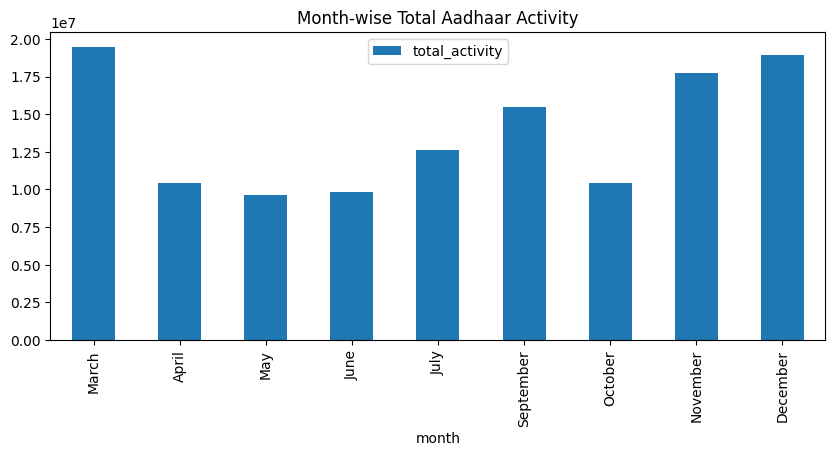

In [ ]:
monthly_activity = (
    daily_activity
    .groupby('month', as_index=False)['total_activity']
    .sum()
)

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

monthly_activity['month'] = pd.Categorical(
    monthly_activity['month'],
    categories=month_order,
    ordered=True
)

monthly_activity = monthly_activity.sort_values('month')

monthly_activity.plot(
    x='month',
    y='total_activity',
    kind='bar',
    figsize=(10,4),
    title='Month-wise Total Aadhaar Activity'
)
